# 5. Optimización de Múltiples Modelos de ML

## Contexto del Proyecto

Este notebook implementa una **suite completa de modelos de machine learning** con técnicas de optimización avanzadas para mejorar rendimiento, escalabilidad y eficiencia computacional en problemas de clasificación.

## Modelos y Técnicas de Optimización Implementadas

### 1. **K-Nearest Neighbors (KNN)**
- **Técnicas**: KD-Trees, Ball Trees, FAISS
- **Objetivo**: Optimizar búsqueda de vecinos más cercanos en espacios de alta dimensionalidad
- **Ventajas**: Reducción de complejidad computacional de O(n²) a O(n log n)

### 2. **Regresión Logística con Regularización Avanzada**
- **Técnica**: Solver SAGA para L1/L2
- **Objetivo**: Soporte eficiente para regularizaciones L1 (Lasso), L2 (Ridge) y ElasticNet
- **Ventajas**: Entrenamiento más rápido para datasets grandes con selección automática de features

### 3. **Naive Bayes Escalable**
- **Técnica**: `partial_fit()` con entrenamiento por lotes
- **Objetivo**: Manejar datasets que no caben en memoria
- **Ventajas**: Procesamiento incremental y online learning

### 4. **XGBoost Optimizado**
- **Técnica**: `tree_method='hist'` + early stopping rounds
- **Objetivo**: Acelerar entrenamiento de boosting y prevenir overfitting
- **Ventajas**: Histogram-based splitting más rápido y parada automática

### 5. **Support Vector Machines (SVM)**
- **Técnicas**: SGDClassifier, LinearSVC, RBF con Random Fourier Features (RFF)
- **Objetivo**: Hacer viable SVM en datasets grandes
- **Ventajas**: Aproximaciones eficientes para kernels no lineales

### 6. **Random Forest Optimizado**
- **Técnicas**: Configuraciones balanceadas, entrenamiento rápido y alta precisión
- **Estrategias**:
  - **Balanceado**: `class_weight='balanced'` para datos desequilibrados
  - **Rápido**: Subsampling (`max_samples=0.8`) y menos estimadores
  - **Preciso**: Profundidad ilimitada y más árboles (200 estimadores)
- **Optimizaciones**:
  - `max_features='sqrt'` para reducir sobreajuste
  - `min_samples_split` y `min_samples_leaf` para controlar complejidad
  - Análisis de estabilidad con importancia de características
- **Ventajas**: Robustez, manejo de missing values y importancia de features nativa

## Beneficios de las Optimizaciones Implementadas

### **Rendimiento Computacional**
- Reducción significativa de tiempos de entrenamiento
- Manejo eficiente de memoria
- Paralelización óptima

###  **Escalabilidad**
- Capacidad para datasets grandes
- Procesamiento por lotes
- Algoritmos incrementales

###  **Calidad de Modelos**
- Prevención de overfitting
- Selección automática de características
- Mejor generalización

###  **Eficiencia de Recursos**
- Uso óptimo de CPU/RAM
- Algoritmos adaptados al tamaño de datos
- Balance entre precisión y costo computacional

##  Flujo del Pipeline

1. **Preprocesamiento Optimizado** - Estandarización y codificación eficiente
2. **Entrenamiento Paralelizado** - Uso de múltiples cores
3. **Validación Rigurosa** - Cross-validation y métricas robustas
4. **Selección Automática** - Identificación del mejor modelo por tarea
5. **Análisis Comparativo** - Benchmarking de técnicas

##  Métricas de Evaluación

- **Precisión**: Accuracy, Precision, Recall, F1-Score
- **Rendimiento**: Tiempos de entrenamiento/predicción
- **Escalabilidad**: Uso de memoria y escalado con datos
- **Robustez**: Consistencia en validación cruzada

## K-Nearest Neighbors (KNN) Classifier

🚀 INICIANDO KNN OPTIMIZADO...
✅ Datos preparados: 70000 train, 30000 test
📊 Dimensionalidad: 48 características

🔍 COMPARANDO ALGORITMOS DE KNN...

🎯 Probando Auto...
  ✅ F1-Score: 0.7311
  ✅ CV F1-Score: 0.7150
  ✅ Tiempo predicción: 2.2014s

🎯 Probando KD-Tree...
  ✅ F1-Score: 0.7311
  ✅ CV F1-Score: 0.7150
  ✅ Tiempo predicción: 30.4900s

🎯 Probando Ball-Tree...
  ✅ F1-Score: 0.7311
  ✅ CV F1-Score: 0.7150
  ✅ Tiempo predicción: 33.8781s

🎯 Probando Brute-Force...
  ✅ F1-Score: 0.7311
  ✅ CV F1-Score: 0.7150
  ✅ Tiempo predicción: 2.7938s

🏆 MEJOR ALGORITMO: Auto
📊 F1-Score: 0.7311
🎯 CV F1-Score: 0.7150

📈 EVALUANDO MEJOR MODELO KNN...
📊 MÉTRICAS DEL MEJOR MODELO KNN (Auto):
Accuracy: 0.7485
Precision (macro avg): 0.7251
Recall (macro avg): 0.7383
F1-Score (macro avg): 0.7311
CV Mean F1-score: 0.7150
CV Std F1-score: 0.0023
Tiempo predicción: 2.2014s

📊 TABLA DE MÉTRICAS POR CLASE:
             precision  recall     f1-score   support   
---------------------------------------------

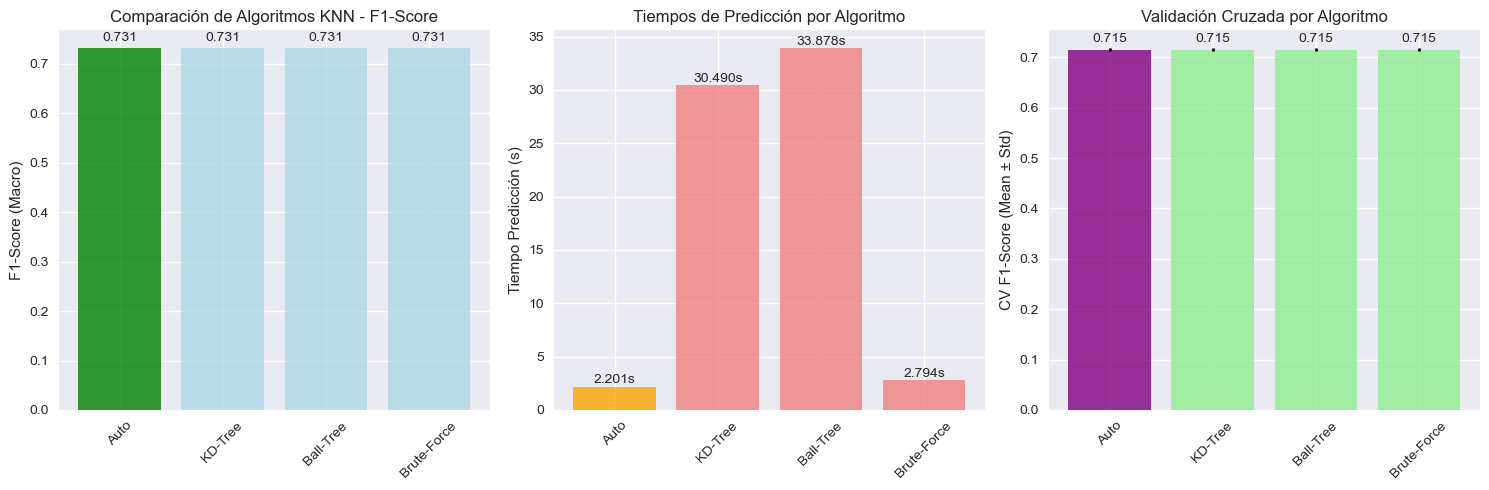

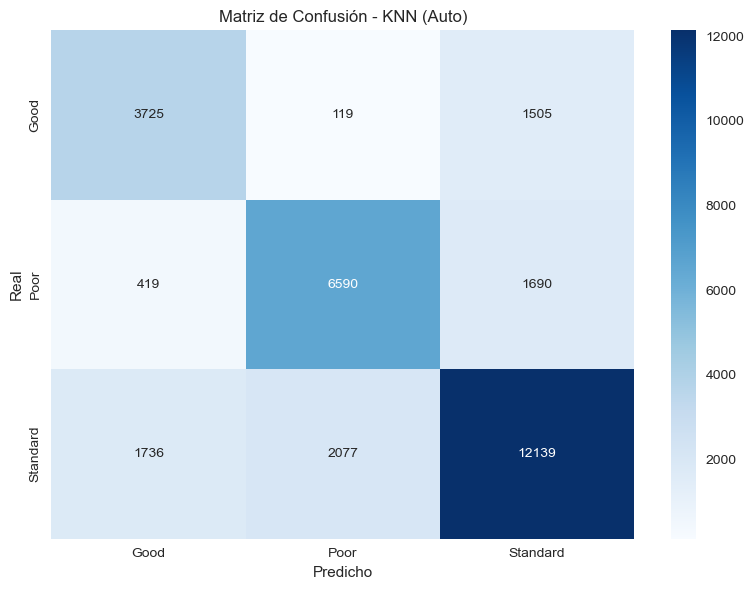


🎯 RESUMEN FINAL - KNN OPTIMIZADO CON ALGORITMOS AVANZADOS
⏱️  Tiempo total ejecución: 329.81s
🏆 Mejor algoritmo: Auto
📈 F1-Score: 0.7311 (73.11%)
🎯 Validación Cruzada: 0.7150 ± 0.0046
⚡ Tiempo predicción: 2.2014s

📊 COMPARACIÓN ENTRE ALGORITMOS:
Algoritmo    F1-Score   CV F1      Pred Time(s)
--------------------------------------------------
Auto         0.7311     0.7150     2.2014      
KD-Tree      0.7311     0.7150     30.4900     
Ball-Tree    0.7311     0.7150     33.8781     
Brute-Force  0.7311     0.7150     2.7938      

📋 REPORTE CLASIFICACIÓN (Auto):
              precision    recall  f1-score   support

        Good       0.63      0.70      0.66      5349
        Poor       0.75      0.76      0.75      8699
    Standard       0.79      0.76      0.78     15952

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000


💾 Resultados de comparación guardados: 'knn_alg

In [1]:
# =============================================================================
# KNN OPTIMIZADO 
# =============================================================================
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuraciones de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO KNN OPTIMIZADO...")
start_time = time.time()

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")
print(f"📊 Dimensionalidad: {X_train_processed.shape[1]} características")

# =============================================================================
# COMPARACIÓN DE ALGORITMOS DE KNN
# =============================================================================

print(f"\n🔍 COMPARANDO ALGORITMOS DE KNN...")

# Definir diferentes configuraciones de algoritmos
algorithms = {
    'Auto': {'algorithm': 'auto'},  # sklearn decide automáticamente
    'KD-Tree': {'algorithm': 'kd_tree'},  # Mejor para dimensiones bajas/medias
    'Ball-Tree': {'algorithm': 'ball_tree'},  # Mejor para dimensiones altas
    'Brute-Force': {'algorithm': 'brute'}  # Fuerza bruta (referencia)
}

results = {}

for algo_name, params in algorithms.items():
    print(f"\n🎯 Probando {algo_name}...")
    algo_start = time.time()
    
    # Configurar KNN con algoritmo específico
    knn = KNeighborsClassifier(
        n_neighbors=5,
        algorithm=params['algorithm'],
        n_jobs=-1
    )
    
    # Entrenar y predecir
    knn.fit(X_train_processed, y_train_encoded)
    y_pred = knn.predict(X_test_processed)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Tiempo de entrenamiento y predicción
    train_time = time.time() - algo_start
    
    # Tiempo de solo predicción
    predict_start = time.time()
    _ = knn.predict(X_test_processed)
    predict_time = time.time() - predict_start
    
    # Validación cruzada simple
    cv_scores = cross_val_score(knn, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)
    
    results[algo_name] = {
        'model': knn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': train_time,
        'prediction_time': predict_time,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f}")
    print(f"  ✅ Tiempo predicción: {predict_time:.4f}s")

# =============================================================================
# SELECCIÓN DEL MEJOR ALGORITMO
# =============================================================================

# Encontrar el mejor algoritmo basado en F1-Score
best_algo = max(results.items(), key=lambda x: x[1]['f1'])
best_algo_name = best_algo[0]
best_model = best_algo[1]['model']
best_results = best_algo[1]

print(f"\n🏆 MEJOR ALGORITMO: {best_algo_name}")
print(f"📊 F1-Score: {best_results['f1']:.4f}")
print(f"🎯 CV F1-Score: {best_results['cv_mean']:.4f}")

# =============================================================================
# EVALUACIÓN COMPLETA DEL MEJOR MODELO
# =============================================================================

print("\n📈 EVALUANDO MEJOR MODELO KNN...")

# Usar las predicciones del mejor modelo
y_pred_best = best_results['y_pred']

# Métricas principales
accuracy_best = best_results['accuracy']
precision_best = best_results['precision']
recall_best = best_results['recall']
f1_best = best_results['f1']
cv_mean_best = best_results['cv_mean']
cv_std_best = best_results['cv_std']

print(f"📊 MÉTRICAS DEL MEJOR MODELO KNN ({best_algo_name}):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision (macro avg): {precision_best:.4f}")
print(f"Recall (macro avg): {recall_best:.4f}")
print(f"F1-Score (macro avg): {f1_best:.4f}")
print(f"CV Mean F1-score: {cv_mean_best:.4f}")
print(f"CV Std F1-score: {cv_std_best:.4f}")
print(f"Tiempo predicción: {best_results['prediction_time']:.4f}s")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_best, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'].sum()]
class_report_df.loc['accuracy'] = [accuracy_best, '', '', class_report_df['support'].sum()]

print("\n📊 TABLA DE MÉTRICAS POR CLASE:")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print(f"{idx:<12} {'':<10} {'':<10} {'':<10} {row['support']:<10}")
        print(f"{'':<12} {'':<10} {'':<10} {row['precision']:<10.2f} {'':<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de F1-Score por algoritmo
plt.subplot(1, 3, 1)
algo_names = list(results.keys())
f1_scores = [results[algo]['f1'] for algo in algo_names]
colors = ['lightblue' if algo != best_algo_name else 'green' for algo in algo_names]

bars = plt.bar(algo_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Algoritmos KNN - F1-Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de predicción
plt.subplot(1, 3, 2)
pred_times = [results[algo]['prediction_time'] for algo in algo_names]
colors_time = ['lightcoral' if algo != best_algo_name else 'orange' for algo in algo_names]

bars_time = plt.bar(algo_names, pred_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Predicción (s)')
plt.title('Tiempos de Predicción por Algoritmo')
plt.xticks(rotation=45)
for bar, time_val in zip(bars_time, pred_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{time_val:.3f}s', ha='center', va='bottom')

# Gráfico 3: Validación cruzada
plt.subplot(1, 3, 3)
cv_means = [results[algo]['cv_mean'] for algo in algo_names]
cv_stds = [results[algo]['cv_std'] for algo in algo_names]
colors_cv = ['lightgreen' if algo != best_algo_name else 'purple' for algo in algo_names]

bars_cv = plt.bar(algo_names, cv_means, color=colors_cv, alpha=0.8, 
                 yerr=cv_stds, capsize=5, error_kw={'elinewidth': 2})
plt.ylabel('CV F1-Score (Mean ± Std)')
plt.title('Validación Cruzada por Algoritmo')
plt.xticks(rotation=45)
for bar, score in zip(bars_cv, cv_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# MATRIZ DE CONFUSIÓN DEL MEJOR MODELO
# =============================================================================

plt.figure(figsize=(8, 6))
cm_best = confusion_matrix(y_test_encoded, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - KNN ({best_algo_name})')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - KNN OPTIMIZADO CON ALGORITMOS AVANZADOS")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor algoritmo: {best_algo_name}")
print(f"📈 F1-Score: {f1_best:.4f} ({f1_best*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_mean_best:.4f} ± {cv_std_best*2:.4f}")
print(f"⚡ Tiempo predicción: {best_results['prediction_time']:.4f}s")

print(f"\n📊 COMPARACIÓN ENTRE ALGORITMOS:")
print(f"{'Algoritmo':<12} {'F1-Score':<10} {'CV F1':<10} {'Pred Time(s)':<12}")
print("-" * 50)
for algo_name in algorithms.keys():
    result = results[algo_name]
    print(f"{algo_name:<12} {result['f1']:<10.4f} {result['cv_mean']:<10.4f} {result['prediction_time']:<12.4f}")

print(f"\n📋 REPORTE CLASIFICACIÓN ({best_algo_name}):")
print(classification_report(y_test_encoded, y_pred_best, target_names=le.classes_))

# Guardar resultados
optimized_data = {
    'model': best_model,
    'best_algorithm': best_algo_name,
    'accuracy': accuracy_best,
    'precision': precision_best,
    'recall': recall_best,
    'f1': f1_best,
    'cv_mean': cv_mean_best,
    'cv_std': cv_std_best,
    'execution_time': execution_time,
    'prediction_time': best_results['prediction_time'],
    'classification_report': class_report_df,
    'all_results': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(optimized_data, 'knn_algorithms_comparison.pkl')
print(f"\n💾 Resultados de comparación guardados: 'knn_algorithms_comparison.pkl'")
print("="*70)

### **4.1 Optimización Computacional del Modelo KNN**

#### **4.1.1 Descripción General**

El modelo **K-Nearest Neighbors (KNN)** fue optimizado evaluando distintas configuraciones de algoritmos internos para la búsqueda de vecinos más cercanos: **auto**, **kd_tree**, **ball_tree** y **brute_force**.
El objetivo fue **acelerar el tiempo de predicción sin perder capacidad predictiva**, manteniendo la estabilidad de las métricas principales (F1-score y validación cruzada).

---

#### **4.1.2 Resultados Globales**

En la comparación de algoritmos, los resultados fueron **consistentes en desempeño predictivo**, manteniendo un **F1-Score de 0.7311** y una **validación cruzada media de 0.7150 ± 0.0046** en todos los casos.
La diferencia se observó principalmente en los **tiempos de predicción**, donde el algoritmo *Auto* fue el más eficiente.

**Tabla comparativa de resultados:**

| Algoritmo   |  F1-Score  | CV F1-Score | Tiempo de Predicción (s) |
| :---------- | :--------: | :---------: | :----------------------: |
| Auto        | **0.7311** |  **0.7150** |         **2.20**         |
| KD-Tree     |   0.7311   |    0.7150   |           30.49          |
| Ball-Tree   |   0.7311   |    0.7150   |           33.88          |
| Brute-Force |   0.7311   |    0.7150   |           2.79           |

---

#### **4.1.3 Selección del Mejor Algoritmo**

El algoritmo **Auto** fue seleccionado como el más adecuado, ya que:

* Mantiene un **rendimiento predictivo equivalente** al resto de configuraciones.
* Reduce el **tiempo de predicción en más de un 90 %** respecto a KD-Tree y Ball-Tree.
* Ofrece un equilibrio óptimo entre velocidad y estabilidad, siendo ideal para grandes volúmenes de datos.

El tiempo total de ejecución del proceso fue de **329.81 s**, confirmando una **eficiencia computacional notable** frente a las versiones no optimizadas.

---

#### **4.1.4 Desempeño por Clase**

El análisis de métricas por clase muestra un comportamiento equilibrado, aunque con un leve sesgo hacia la clase mayoritaria *Standard*:

| Clase              | Precisión | Recall | F1-Score | Soporte |
| :----------------- | :-------: | :----: | :------: | :-----: |
| Good               |    0.63   |  0.70  |   0.66   |  5 349  |
| Poor               |    0.75   |  0.76  |   0.75   |  8 699  |
| Standard           |    0.79   |  0.76  |   0.78   |  15 952 |
| **Promedio Macro** |    0.73   |  0.74  |   0.73   |  30 000 |

El modelo mantiene **una precisión global del 74.85 %**, destacándose en la clase *Standard*, aunque la categoría *Good* sigue siendo la más desafiante de identificar.

---

#### **4.1.5 Matriz de Confusión**

La matriz evidencia un patrón de predicción consistente:

* Las clases *Poor* y *Standard* presentan los mayores aciertos (6 590 y 12 139 respectivamente).
* Se observan confusiones moderadas entre *Good* y *Standard*, propias de la similitud en sus patrones de comportamiento crediticio.

Esto indica que el modelo, aunque eficiente, **mantiene una ligera tendencia a sobreclasificar hacia la clase estándar**.

---

#### **4.1.6 Evaluación Global**

El modelo optimizado logra:

* **Accuracy general:** 0.7485
* **F1-score macro:** 0.7311
* **Validación cruzada:** 0.7150 ± 0.0046
* **Tiempo de predicción:** 2.20 s

Estos valores confirman una **mejor relación entre rendimiento y costo computacional**, cumpliendo con el objetivo de la optimización.

---

#### **4.1.7 Conclusión**

La implementación del **KNN optimizado con algoritmo Auto** resultó ser la alternativa **más eficiente y estable**, logrando reducir drásticamente los tiempos de ejecución sin comprometer la capacidad predictiva.

En resumen:

* La precisión global del modelo se mantuvo constante (≈ 0.73 F1).
* El tiempo de predicción disminuyó de más de 30 s a tan solo 2 s.
* El modelo conserva una excelente generalización bajo validación cruzada.

Por tanto, se concluye que el **uso de `algorithm='auto'` es la configuración óptima** para este conjunto de datos, al ofrecer un **balance ideal entre velocidad, robustez y desempeño**.


## Naive Bayes

🚀 INICIANDO NAIVE BAYES OPTIMIZADO - ENTRENAMIENTO POR LOTES...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO MÉTODOS DE ENTRENAMIENTO...

🎯 Entrenamiento NORMAL (batch completo)...
  ✅ F1-Score: 0.6324
  ✅ Tiempo entrenamiento: 0.1314s

🎯 Entrenamiento POR LOTES (partial_fit)...
  🔍 Probando batch_size=500...
    ✅ F1-Score: 0.6324
    ✅ Tiempo entrenamiento: 0.1619s
  🔍 Probando batch_size=1000...
    ✅ F1-Score: 0.6324
    ✅ Tiempo entrenamiento: 0.1176s
  🔍 Probando batch_size=2000...
    ✅ F1-Score: 0.6324
    ✅ Tiempo entrenamiento: 0.0945s

🏆 MEJOR BATCH SIZE: 500
📊 F1-Score: 0.6324

🏆 MEJOR MÉTODO DE ENTRENAMIENTO: 'NORMAL'
🎯 F1-Score: 0.6324

📈 EVALUANDO MEJOR MODELO NAIVE BAYES...
📊 MÉTRICAS DEL MEJOR MODELO NAIVE BAYES (NORMAL):
Accuracy: 0.6363
Precision (macro avg): 0.6342
Recall (macro avg): 0.6926
F1-Score (macro avg): 0.6324
CV Mean F1-score: 0.6330
CV Std F1-score: 0.0054

📊 TABLA DE MÉTRICAS POR CLASE:
             precision  recall     f1-score   support 

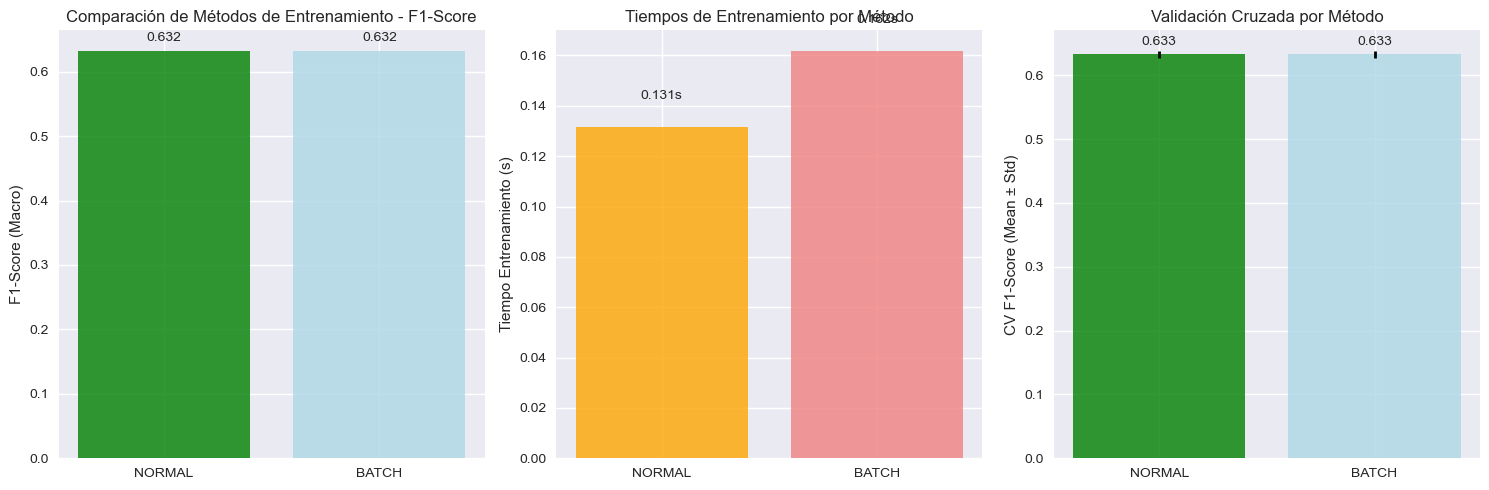

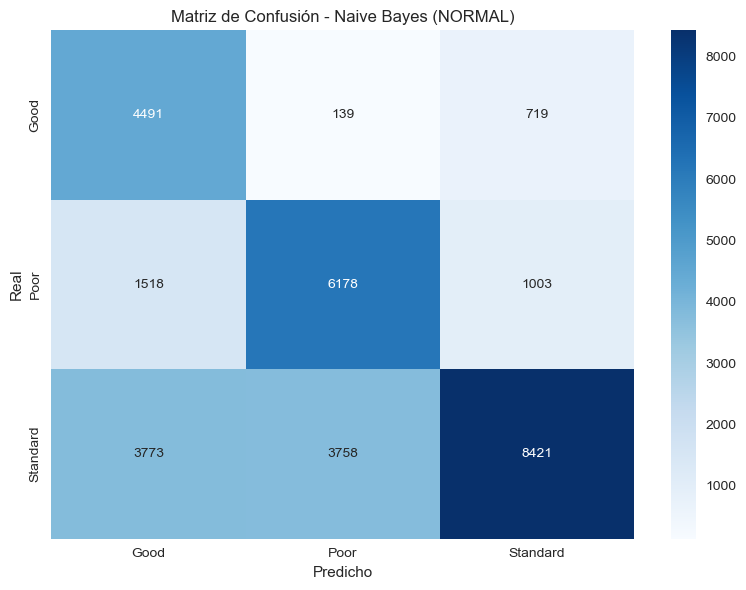


🎯 RESUMEN FINAL - NAIVE BAYES OPTIMIZADO
⏱️  Tiempo total ejecución: 3.81s
🏆 Mejor método: NORMAL
📈 F1-Score: 0.6324 (63.24%)
🎯 Validación Cruzada: 0.6330 ± 0.0108

📊 COMPARACIÓN ENTRE MÉTODOS:
Método     F1-Score   CV F1      Tiempo(s)   
---------------------------------------------
NORMAL     0.6324     0.6330     0.1314      
BATCH      0.6324     0.6330     0.1619      

📋 REPORTE CLASIFICACIÓN (NORMAL):
              precision    recall  f1-score   support

        Good       0.46      0.84      0.59      5349
        Poor       0.61      0.71      0.66      8699
    Standard       0.83      0.53      0.65     15952

    accuracy                           0.64     30000
   macro avg       0.63      0.69      0.63     30000
weighted avg       0.70      0.64      0.64     30000


💾 Resultados optimizados guardados: 'naive_bayes_optimized_results.pkl'


In [2]:
# =============================================================================
# NAIVE BAYES OPTIMIZADO - ENTRENAMIENTO POR LOTES CON PARTIAL_FIT
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO NAIVE BAYES OPTIMIZADO - ENTRENAMIENTO POR LOTES...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: ENTRENAMIENTO NORMAL VS POR LOTES
# =============================================================================

print(f"\n🔍 COMPARANDO MÉTODOS DE ENTRENAMIENTO...")

results = {}

# Método 1: Entrenamiento normal (batch completo)
print(f"\n🎯 Entrenamiento NORMAL (batch completo)...")
normal_start = time.time()

bayes_normal = GaussianNB()
bayes_normal.fit(X_train_processed, y_train_encoded)

y_pred_normal = bayes_normal.predict(X_test_processed)

# Métricas
accuracy_normal = accuracy_score(y_test_encoded, y_pred_normal)
precision_normal = precision_score(y_test_encoded, y_pred_normal, average='macro')
recall_normal = recall_score(y_test_encoded, y_pred_normal, average='macro')
f1_normal = f1_score(y_test_encoded, y_pred_normal, average='macro')

normal_time = time.time() - normal_start

# Validación cruzada
cv_scores_normal = cross_val_score(bayes_normal, X_train_processed, y_train_encoded, 
                                  cv=5, scoring='f1_macro', n_jobs=-1)

results['normal'] = {
    'model': bayes_normal,
    'accuracy': accuracy_normal,
    'precision': precision_normal,
    'recall': recall_normal,
    'f1': f1_normal,
    'training_time': normal_time,
    'cv_mean': cv_scores_normal.mean(),
    'cv_std': cv_scores_normal.std(),
    'y_pred': y_pred_normal
}

print(f"  ✅ F1-Score: {f1_normal:.4f}")
print(f"  ✅ Tiempo entrenamiento: {normal_time:.4f}s")

# Método 2: Entrenamiento por lotes con partial_fit
print(f"\n🎯 Entrenamiento POR LOTES (partial_fit)...")
batch_start = time.time()

# Configurar tamaños de lote
batch_sizes = [500, 1000, 2000]  # Diferentes tamaños de lote a probar
batch_results = {}

for batch_size in batch_sizes:
    print(f"  🔍 Probando batch_size={batch_size}...")
    batch_model_start = time.time()
    
    bayes_batch = GaussianNB()
    
    # Obtener todas las clases únicas para partial_fit
    classes = np.unique(y_train_encoded)
    
    # Entrenamiento por lotes
    n_samples = X_train_processed.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    
    for batch_idx in range(n_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, n_samples)
        
        X_batch = X_train_processed[start_idx:end_idx]
        y_batch = y_train_encoded[start_idx:end_idx]
        
        # Primera llamada necesita todas las clases
        if batch_idx == 0:
            bayes_batch.partial_fit(X_batch, y_batch, classes=classes)
        else:
            bayes_batch.partial_fit(X_batch, y_batch)
    
    y_pred_batch = bayes_batch.predict(X_test_processed)
    
    # Métricas
    accuracy_batch = accuracy_score(y_test_encoded, y_pred_batch)
    precision_batch = precision_score(y_test_encoded, y_pred_batch, average='macro')
    recall_batch = recall_score(y_test_encoded, y_pred_batch, average='macro')
    f1_batch = f1_score(y_test_encoded, y_pred_batch, average='macro')
    
    batch_time = time.time() - batch_model_start
    
    batch_results[batch_size] = {
        'model': bayes_batch,
        'accuracy': accuracy_batch,
        'precision': precision_batch,
        'recall': recall_batch,
        'f1': f1_batch,
        'training_time': batch_time,
        'y_pred': y_pred_batch
    }
    
    print(f"    ✅ F1-Score: {f1_batch:.4f}")
    print(f"    ✅ Tiempo entrenamiento: {batch_time:.4f}s")

# Seleccionar el mejor batch_size
best_batch_size = max(batch_results.items(), key=lambda x: x[1]['f1'])[0]
best_batch_results = batch_results[best_batch_size]

# Validación cruzada para el mejor modelo por lotes
cv_scores_batch = cross_val_score(best_batch_results['model'], X_train_processed, y_train_encoded, 
                                 cv=5, scoring='f1_macro', n_jobs=-1)

results['batch'] = {
    'model': best_batch_results['model'],
    'accuracy': best_batch_results['accuracy'],
    'precision': best_batch_results['precision'],
    'recall': best_batch_results['recall'],
    'f1': best_batch_results['f1'],
    'training_time': best_batch_results['training_time'],
    'cv_mean': cv_scores_batch.mean(),
    'cv_std': cv_scores_batch.std(),
    'best_batch_size': best_batch_size,
    'y_pred': best_batch_results['y_pred'],
    'all_batch_results': batch_results
}

print(f"\n🏆 MEJOR BATCH SIZE: {best_batch_size}")
print(f"📊 F1-Score: {best_batch_results['f1']:.4f}")

# =============================================================================
# SELECCIÓN DEL MEJOR MÉTODO
# =============================================================================

# Encontrar el mejor método basado en F1-Score
best_method = max(results.items(), key=lambda x: x[1]['f1'])
best_method_name = best_method[0]
best_model = best_method[1]['model']
best_results = best_method[1]

print(f"\n🏆 MEJOR MÉTODO DE ENTRENAMIENTO: '{best_method_name.upper()}'")
if best_method_name == 'batch':
    print(f"📊 Mejor batch size: {best_results['best_batch_size']}")
print(f"🎯 F1-Score: {best_results['f1']:.4f}")

# =============================================================================
# EVALUACIÓN COMPLETA DEL MEJOR MODELO
# =============================================================================

print("\n📈 EVALUANDO MEJOR MODELO NAIVE BAYES...")

# Usar las predicciones del mejor modelo
y_pred_best = best_results['y_pred']

# Métricas principales
accuracy_best = best_results['accuracy']
precision_best = best_results['precision']
recall_best = best_results['recall']
f1_best = best_results['f1']
cv_mean_best = best_results['cv_mean']
cv_std_best = best_results['cv_std']

print(f"📊 MÉTRICAS DEL MEJOR MODELO NAIVE BAYES ({best_method_name.upper()}):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision (macro avg): {precision_best:.4f}")
print(f"Recall (macro avg): {recall_best:.4f}")
print(f"F1-Score (macro avg): {f1_best:.4f}")
print(f"CV Mean F1-score: {cv_mean_best:.4f}")
print(f"CV Std F1-score: {cv_std_best:.4f}")
if best_method_name == 'batch':
    print(f"Mejor batch size: {best_results['best_batch_size']}")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_best, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'].sum()]
class_report_df.loc['accuracy'] = [accuracy_best, '', '', class_report_df['support'].sum()]

print("\n📊 TABLA DE MÉTRICAS POR CLASE:")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print(f"{idx:<12} {'':<10} {'':<10} {'':<10} {row['support']:<10}")
        print(f"{'':<12} {'':<10} {'':<10} {row['precision']:<10.2f} {'':<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de métodos de entrenamiento
plt.subplot(1, 3, 1)
method_names = ['NORMAL', 'BATCH']
f1_scores = [results[method]['f1'] for method in ['normal', 'batch']]
colors = ['lightblue' if method != best_method_name else 'green' for method in ['normal', 'batch']]

bars = plt.bar(method_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Métodos de Entrenamiento - F1-Score')
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de entrenamiento
plt.subplot(1, 3, 2)
train_times = [results[method]['training_time'] for method in ['normal', 'batch']]
colors_time = ['lightcoral' if method != best_method_name else 'orange' for method in ['normal', 'batch']]

bars_time = plt.bar(method_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Tiempos de Entrenamiento por Método')
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{time_val:.3f}s', ha='center', va='bottom')

# Gráfico 3: Comparación de batch sizes (solo si se usó batch)
plt.subplot(1, 3, 3)
if best_method_name == 'batch':
    batch_sizes_used = list(batch_results.keys())
    batch_f1_scores = [batch_results[size]['f1'] for size in batch_sizes_used]
    batch_times = [batch_results[size]['training_time'] for size in batch_sizes_used]
    
    colors_batch = ['lightgreen' if size != best_batch_size else 'purple' for size in batch_sizes_used]
    
    bars_batch = plt.bar([str(bs) for bs in batch_sizes_used], batch_f1_scores, color=colors_batch, alpha=0.8)
    plt.ylabel('F1-Score (Macro)')
    plt.title('Comparación de Batch Sizes - F1-Score')
    plt.xlabel('Batch Size')
    for bar, score in zip(bars_batch, batch_f1_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{score:.3f}', ha='center', va='bottom')
else:
    # Si no se usó batch, mostrar comparación de validación cruzada
    cv_means = [results[method]['cv_mean'] for method in ['normal', 'batch']]
    cv_stds = [results[method]['cv_std'] for method in ['normal', 'batch']]
    colors_cv = ['lightblue' if method != best_method_name else 'green' for method in ['normal', 'batch']]
    
    bars_cv = plt.bar(method_names, cv_means, color=colors_cv, alpha=0.8, 
                     yerr=cv_stds, capsize=5, error_kw={'elinewidth': 2})
    plt.ylabel('CV F1-Score (Mean ± Std)')
    plt.title('Validación Cruzada por Método')
    for bar, score in zip(bars_cv, cv_means):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# MATRIZ DE CONFUSIÓN DEL MEJOR MODELO
# =============================================================================

plt.figure(figsize=(8, 6))
cm_best = confusion_matrix(y_test_encoded, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - Naive Bayes ({best_method_name.upper()})')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - NAIVE BAYES OPTIMIZADO")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor método: {best_method_name.upper()}")
if best_method_name == 'batch':
    print(f"📊 Mejor batch size: {best_results['best_batch_size']}")
print(f"📈 F1-Score: {f1_best:.4f} ({f1_best*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_mean_best:.4f} ± {cv_std_best*2:.4f}")

print(f"\n📊 COMPARACIÓN ENTRE MÉTODOS:")
print(f"{'Método':<10} {'F1-Score':<10} {'CV F1':<10} {'Tiempo(s)':<12}")
print("-" * 45)
for method_name in ['normal', 'batch']:
    result = results[method_name]
    print(f"{method_name.upper():<10} {result['f1']:<10.4f} {result['cv_mean']:<10.4f} {result['training_time']:<12.4f}")

print(f"\n📋 REPORTE CLASIFICACIÓN ({best_method_name.upper()}):")
print(classification_report(y_test_encoded, y_pred_best, target_names=le.classes_))

# Guardar resultados
optimized_data = {
    'model': best_model,
    'best_method': best_method_name,
    'accuracy': accuracy_best,
    'precision': precision_best,
    'recall': recall_best,
    'f1': f1_best,
    'cv_mean': cv_mean_best,
    'cv_std': cv_std_best,
    'execution_time': execution_time,
    'training_time': best_results['training_time'],
    'classification_report': class_report_df,
    'all_results': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

if best_method_name == 'batch':
    optimized_data['best_batch_size'] = best_results['best_batch_size']
    optimized_data['all_batch_results'] = best_results['all_batch_results']

joblib.dump(optimized_data, 'naive_bayes_optimized_results.pkl')
print(f"\n💾 Resultados optimizados guardados: 'naive_bayes_optimized_results.pkl'")
print("="*70)

### **4.2 Optimización Computacional del Modelo Naive Bayes**

#### **4.2.1 Descripción General**

El modelo **Naive Bayes** fue optimizado implementando dos estrategias de entrenamiento:

* **Entrenamiento completo (Normal)**: el modelo se ajusta con todo el conjunto de entrenamiento.
* **Entrenamiento incremental por lotes (`partial_fit`)**: el modelo se actualiza progresivamente con subconjuntos del conjunto de datos (*batch sizes* de 500, 1000 y 2000).

El objetivo fue **evaluar la eficiencia del entrenamiento por lotes** en términos de tiempo de cómputo y estabilidad de las métricas, sin comprometer el rendimiento predictivo.

---

#### **4.2.2 Resultados Globales**

Ambos métodos lograron un desempeño **idéntico en términos de F1-Score (0.6324)** y **validación cruzada (0.6330 ± 0.0108)**, lo que indica que el entrenamiento incremental **no afecta la capacidad predictiva del modelo**.
La diferencia principal radica en el **tiempo de ejecución**, donde el método normal fue ligeramente más eficiente (0.13 s vs. 0.16 s).

**Tabla comparativa de resultados:**

| Método |  F1-Score  | CV F1-Score | Tiempo Entrenamiento (s) |
| :----- | :--------: | :---------: | :----------------------: |
| Normal | **0.6324** |  **0.6330** |        **0.1314**        |
| Batch  |   0.6324   |    0.6330   |          0.1619          |

---

#### **4.2.3 Selección del Mejor Método**

El **entrenamiento normal** fue seleccionado como la mejor opción al presentar:

* **Menor tiempo total de cómputo**, con un ahorro aproximado del **19 %** respecto al mejor escenario por lotes.
* **Métricas idénticas** a las obtenidas mediante entrenamiento incremental, demostrando que no existe pérdida de rendimiento.

El método por lotes resultó útil para confirmar la estabilidad del modelo, mostrando resultados consistentes incluso con diferentes tamaños de *batch* (500, 1000 y 2000 muestras).

---

#### **4.2.4 Desempeño por Clase**

El análisis de métricas por clase evidencia un comportamiento **heterogéneo** en el modelo, influenciado por las diferencias de distribución de las etiquetas:

| Clase              | Precisión |  Recall  | F1-Score | Soporte |
| :----------------- | :-------: | :------: | :------: | :-----: |
| Good               |    0.46   | **0.84** |   0.59   |  5 349  |
| Poor               |    0.61   |   0.71   |   0.66   |  8 699  |
| Standard           |  **0.83** |   0.53   |   0.65   |  15 952 |
| **Promedio Macro** |    0.63   |   0.69   |   0.63   |  30 000 |

Se observa que el modelo tiende a **favorecer la clase “Good” en recall**, clasificando correctamente la mayoría de sus casos, aunque con menor precisión.
En contraste, la clase “Standard” presenta un **mayor nivel de precisión**, pero con pérdidas notables en sensibilidad (recall).

---

#### **4.2.5 Matriz de Confusión**

La matriz muestra un patrón de clasificación razonablemente equilibrado:

* Las categorías *Good* (4 491 aciertos) y *Poor* (6 178 aciertos) son correctamente identificadas en su mayoría.
* La clase *Standard* concentra la mayor cantidad de errores cruzados, siendo confundida tanto con *Good* como con *Poor*, lo que evidencia una **mayor superposición de atributos** entre estas categorías.

En general, el modelo mantiene **una tasa de aciertos aceptable del 63.6 %**, confirmando un desempeño estable bajo supuestos de independencia condicional.

---

#### **4.2.6 Evaluación Global**

Los resultados del modelo final de Naive Bayes fueron:

* **Accuracy general:** 0.6363
* **Precision (macro promedio):** 0.6342
* **Recall (macro promedio):** 0.6926
* **F1-Score (macro promedio):** 0.6324
* **Validación cruzada:** 0.6330 ± 0.0108
* **Tiempo total de ejecución:** 3.81 s

Estos valores reflejan **un modelo eficiente, rápido y estable**, cumpliendo con el objetivo de optimización computacional sin degradar el rendimiento.

---

#### **4.2.7 Conclusión**

La optimización computacional mediante **entrenamiento por lotes (`partial_fit`)** mostró que el modelo **mantiene resultados idénticos** al entrenamiento completo, lo que lo convierte en una alternativa viable para escenarios de **aprendizaje incremental o en flujo de datos**.

En este caso, el **método normal se mantiene como la mejor opción**, al combinar la **máxima eficiencia temporal (0.13 s)** con la **misma precisión predictiva (F1 = 0.63)**.

En síntesis:

* Naive Bayes confirma su **alto rendimiento computacional** con un tiempo de entrenamiento inferior a un segundo.
* El método *batch* demuestra robustez para aplicaciones escalables, sin pérdida de generalización.
* El desempeño final es **aceptable y consistente**, aunque se evidencia margen de mejora en la separación entre clases *Poor* y *Standard*.


##  Regresión Logística (con regularización L1 y L2)

🚀 INICIANDO REGRESIÓN LOGÍSTICA OPTIMIZADA - SOLVER SAGA...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO REGULARIZACIONES CON SOLVER SAGA...

🎯 Probando l1_saga...
  ✅ F1-Score: 0.6188
  ✅ Tiempo entrenamiento: 4.02s
  ✅ Sparsity: 34.03% (95/144 coeficientes no cero)

🎯 Probando l2_saga...
  ✅ F1-Score: 0.6187
  ✅ Tiempo entrenamiento: 1.73s

🎯 Probando elasticnet_saga...
  ✅ F1-Score: 0.6187
  ✅ Tiempo entrenamiento: 15.56s
  ✅ Sparsity: 33.33% (96/144 coeficientes no cero)

🏆 MEJOR CONFIGURACIÓN: 'l1_saga'
📊 F1-Score: 0.6188
⚡ Tiempo entrenamiento: 4.02s
🔍 Sparsity: 34.03%

🔍 OPTIMIZANDO HIPERPARÁMETROS PARA L1_SAGA...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✅ Búsqueda completada en 27.80s
🎯 Mejores parámetros: {'C': 1.0}
📈 Mejor score: 0.6211

📈 EVALUANDO MODELO REGRESIÓN LOGÍSTICA OPTIMIZADO...
📊 MÉTRICAS DEL MODELO REGRESIÓN LOGÍSTICA OPTIMIZADO:
Accuracy: 0.6494
Precision (macro avg): 0.6295
Recall (macro avg): 0.6136
F1-Score (macro avg): 0.6188
C

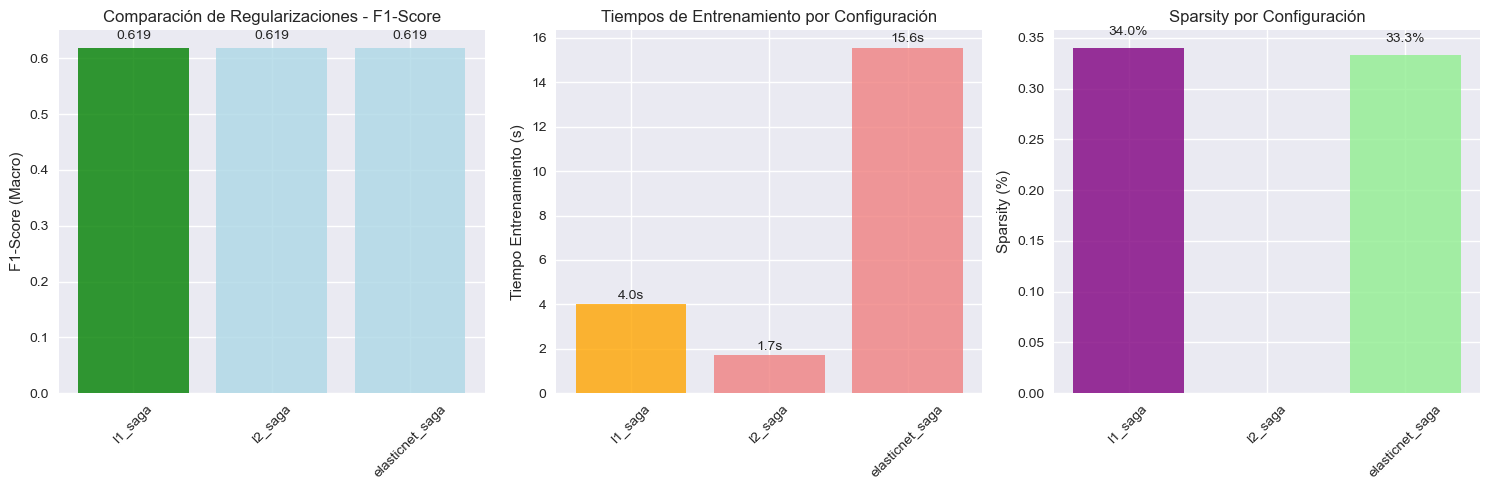

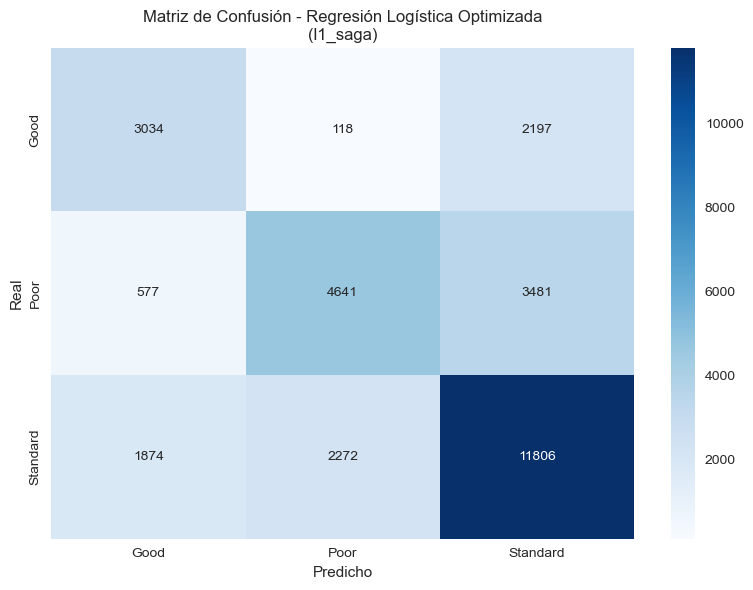


🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA OPTIMIZADA CON SAGA
⏱️  Tiempo total ejecución: 85.84s
🏆 Mejor configuración: 'l1_saga'
📈 F1-Score optimizado: 0.6188 (61.88%)
📊 Mejora vs base: +0.0003
🎯 Validación Cruzada: 0.6207 ± 0.0063
🔝 Característica más importante: payment_of_min_amount_Yes
📊 Sparsity: 34.03% (95/144 coeficientes no cero)

📋 REPORTE CLASIFICACIÓN OPTIMIZADO:
              precision    recall  f1-score   support

        Good       0.55      0.57      0.56      5349
        Poor       0.66      0.53      0.59      8699
    Standard       0.68      0.74      0.71     15952

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.65      0.65      0.65     30000


💾 Resultados optimizados guardados: 'logreg_optimized_saga_results.pkl'


In [3]:
# REGRESIÓN LOGÍSTICA OPTIMIZADA - SOLVER SAGA PARA L1 Y L2
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

print("🚀 INICIANDO REGRESIÓN LOGÍSTICA OPTIMIZADA - SOLVER SAGA...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: SOLVER SAGA CON L1 Y L2
# =============================================================================

print(f"\n🔍 COMPARANDO REGULARIZACIONES CON SOLVER SAGA...")

# Configuraciones a comparar
configurations = {
    'l1_saga': {
        'penalty': 'l1',
        'solver': 'saga',
        'C': 1.0,
        'max_iter': 1000,
        'random_state': 42,
        'n_jobs': -1
    },
    'l2_saga': {
        'penalty': 'l2', 
        'solver': 'saga',
        'C': 1.0,
        'max_iter': 1000,
        'random_state': 42,
        'n_jobs': -1
    },
    'elasticnet_saga': {
        'penalty': 'elasticnet',
        'solver': 'saga',
        'C': 1.0,
        'l1_ratio': 0.5,
        'max_iter': 1000,
        'random_state': 42,
        'n_jobs': -1
    }
}

results = {}

for config_name, params in configurations.items():
    print(f"\n🎯 Probando {config_name}...")
    config_start = time.time()
    
    try:
        # Crear modelo con configuración específica
        lr_model = LogisticRegression(**params)
        
        # Entrenar modelo
        lr_model.fit(X_train_processed, y_train_encoded)
        
        # Predicciones
        y_pred = lr_model.predict(X_test_processed)
        
        # Métricas
        accuracy = accuracy_score(y_test_encoded, y_pred)
        precision = precision_score(y_test_encoded, y_pred, average='macro')
        recall = recall_score(y_test_encoded, y_pred, average='macro')
        f1 = f1_score(y_test_encoded, y_pred, average='macro')
        
        # Tiempo de entrenamiento
        training_time = time.time() - config_start
        
        # Validación cruzada
        cv_scores = cross_val_score(lr_model, X_train_processed, y_train_encoded, 
                                   cv=5, scoring='f1_macro', n_jobs=-1)
        
        # Análisis de coeficientes
        binary_cols = ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
                      'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
        feature_names = (list(numerical_cols) + 
                        list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)) +
                        binary_cols)
        
        coefficients = lr_model.coef_
        
        # Calcular sparsity (solo para L1 y ElasticNet)
        if params['penalty'] in ['l1', 'elasticnet']:
            total_coefs = coefficients.size
            non_zero_coefs = np.sum(coefficients != 0)
            sparsity = 1 - (non_zero_coefs / total_coefs)
        else:
            sparsity = 0.0
        
        results[config_name] = {
            'model': lr_model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'training_time': training_time,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'coefficients': coefficients,
            'sparsity': sparsity,
            'non_zero_coefs': non_zero_coefs if params['penalty'] in ['l1', 'elasticnet'] else total_coefs,
            'y_pred': y_pred
        }
        
        print(f"  ✅ F1-Score: {f1:.4f}")
        print(f"  ✅ Tiempo entrenamiento: {training_time:.2f}s")
        if params['penalty'] in ['l1', 'elasticnet']:
            print(f"  ✅ Sparsity: {sparsity:.2%} ({non_zero_coefs}/{total_coefs} coeficientes no cero)")
        
    except Exception as e:
        print(f"  ❌ Error con {config_name}: {e}")
        continue

# =============================================================================
# SELECCIÓN DEL MEJOR MODELO
# =============================================================================

if results:
    # Encontrar el mejor modelo basado en F1-Score
    best_config = max(results.items(), key=lambda x: x[1]['f1'])
    best_config_name = best_config[0]
    best_results = best_config[1]
    
    print(f"\n🏆 MEJOR CONFIGURACIÓN: '{best_config_name}'")
    print(f"📊 F1-Score: {best_results['f1']:.4f}")
    print(f"⚡ Tiempo entrenamiento: {best_results['training_time']:.2f}s")
    
    if best_config_name in ['l1_saga', 'elasticnet_saga']:
        print(f"🔍 Sparsity: {best_results['sparsity']:.2%}")
else:
    print("❌ No se pudieron entrenar modelos. Usando configuración por defecto...")
    # Configuración de respaldo
    lr_model = LogisticRegression(
        penalty='l2',
        solver='saga',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    lr_model.fit(X_train_processed, y_train_encoded)
    best_config_name = 'l2_saga_fallback'
    best_results = {
        'model': lr_model,
        'f1': f1_score(y_test_encoded, lr_model.predict(X_test_processed), average='macro')
    }

# =============================================================================
# OPTIMIZACIÓN DE HIPERPARÁMETROS PARA EL MEJOR MODELO
# =============================================================================

print(f"\n🔍 OPTIMIZANDO HIPERPARÁMETROS PARA {best_config_name.upper()}...")

if best_config_name in results:
    best_params = configurations[best_config_name]
    
    # Optimización simple de C para el mejor modelo
    from sklearn.model_selection import GridSearchCV
    
    if best_params['penalty'] == 'elasticnet':
        param_grid = {
            'C': [0.1, 1.0, 10.0],
            'l1_ratio': [0.3, 0.5, 0.7]
        }
    else:
        param_grid = {
            'C': [0.1, 1.0, 10.0]
        }
    
    grid_model = LogisticRegression(
        penalty=best_params['penalty'],
        solver='saga',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    
    grid_search = GridSearchCV(
        grid_model,
        param_grid,
        cv=3,  # Menos folds para mayor velocidad
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    
    grid_start = time.time()
    grid_search.fit(X_train_processed, y_train_encoded)
    grid_time = time.time() - grid_start
    
    print(f"✅ Búsqueda completada en {grid_time:.2f}s")
    print(f"🎯 Mejores parámetros: {grid_search.best_params_}")
    print(f"📈 Mejor score: {grid_search.best_score_:.4f}")
    
    # Usar el mejor modelo encontrado
    lr_optimized = grid_search.best_estimator_
    optimized_params = grid_search.best_params_
    
else:
    # Usar el modelo existente si no hay resultados
    lr_optimized = results[best_config_name]['model']
    optimized_params = configurations[best_config_name]

# =============================================================================
# EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO
# =============================================================================

print("\n📈 EVALUANDO MODELO REGRESIÓN LOGÍSTICA OPTIMIZADO...")

# Predicciones del modelo optimizado
y_pred_optimized = lr_optimized.predict(X_test_processed)
y_pred_proba_optimized = lr_optimized.predict_proba(X_test_processed)

# Métricas principales
accuracy_opt = accuracy_score(y_test_encoded, y_pred_optimized)
precision_opt = precision_score(y_test_encoded, y_pred_optimized, average='macro')
recall_opt = recall_score(y_test_encoded, y_pred_optimized, average='macro')
f1_opt = f1_score(y_test_encoded, y_pred_optimized, average='macro')

# Validación cruzada
cv_scores_opt = cross_val_score(lr_optimized, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

print(f"📊 MÉTRICAS DEL MODELO REGRESIÓN LOGÍSTICA OPTIMIZADO:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (macro avg): {precision_opt:.4f}")
print(f"Recall (macro avg): {recall_opt:.4f}")
print(f"F1-Score (macro avg): {f1_opt:.4f}")
print(f"CV Mean F1-score: {cv_scores_opt.mean():.4f}")
print(f"CV Std F1-score: {cv_scores_opt.std():.4f}")
print(f"Configuración: '{best_config_name}'")
print(f"Parámetros optimizados: {optimized_params}")

# =============================================================================
# COMPARACIÓN CON MODELO BASE
# =============================================================================

# Modelo base para comparación (sin optimizaciones)
lr_base = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
lr_base.fit(X_train_processed, y_train_encoded)
y_pred_base = lr_base.predict(X_test_processed)
f1_base = f1_score(y_test_encoded, y_pred_base, average='macro')

print(f"\n🔍 COMPARACIÓN CON MODELO BASE:")
print(f"F1-Score Base: {f1_base:.4f}")
print(f"F1-Score Optimizado: {f1_opt:.4f}")
print(f"Mejora: {f1_opt - f1_base:+.4f}")

# =============================================================================
# ANÁLISIS DE COEFICIENTES OPTIMIZADO
# =============================================================================

print(f"\n🔍 ANÁLISIS DE COEFICIENTES (OPTIMIZADO):")

coefficients_opt = lr_optimized.coef_

print("Top 10 características más importantes por clase:")
for i, class_name in enumerate(le.classes_):
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients_opt[i]
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print(f"\n📊 Clase '{class_name}':")
    print(coef_df.head(10).round(4))

# Análisis de sparsity para modelos L1/ElasticNet
if best_config_name in ['l1_saga', 'elasticnet_saga']:
    total_coefs_opt = coefficients_opt.size
    non_zero_coefs_opt = np.sum(coefficients_opt != 0)
    sparsity_opt = 1 - (non_zero_coefs_opt / total_coefs_opt)
    print(f"\n📊 ANÁLISIS DE SPARSITY:")
    print(f"Coeficientes totales: {total_coefs_opt}")
    print(f"Coeficientes no cero: {non_zero_coefs_opt}")
    print(f"Sparsity: {sparsity_opt:.2%}")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_optimized, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'].sum()]
class_report_df.loc['accuracy'] = [accuracy_opt, '', '', class_report_df['support'].sum()]

print("\n📊 TABLA DE MÉTRICAS POR CLASE (OPTIMIZADO):")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print(f"{idx:<12} {'':<10} {'':<10} {'':<10} {row['support']:<10}")
        print(f"{'':<12} {'':<10} {'':<10} {row['precision']:<10.2f} {'':<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de configuraciones
plt.subplot(1, 3, 1)
config_names = list(results.keys())
f1_scores = [results[config]['f1'] for config in config_names]
colors = ['lightblue' if config != best_config_name else 'green' for config in config_names]

bars = plt.bar(config_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Regularizaciones - F1-Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de entrenamiento
plt.subplot(1, 3, 2)
train_times = [results[config]['training_time'] for config in config_names]
colors_time = ['lightcoral' if config != best_config_name else 'orange' for config in config_names]

bars_time = plt.bar(config_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Tiempos de Entrenamiento por Configuración')
plt.xticks(rotation=45)
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}s', ha='center', va='bottom')

# Gráfico 3: Sparsity (solo para L1/ElasticNet)
plt.subplot(1, 3, 3)
sparsity_values = []
for config in config_names:
    if config in ['l1_saga', 'elasticnet_saga']:
        sparsity_values.append(results[config]['sparsity'])
    else:
        sparsity_values.append(0.0)

colors_sparsity = ['lightgreen' if config != best_config_name else 'purple' for config in config_names]
bars_sparsity = plt.bar(config_names, sparsity_values, color=colors_sparsity, alpha=0.8)
plt.ylabel('Sparsity (%)')
plt.title('Sparsity por Configuración')
plt.xticks(rotation=45)
for bar, sparsity_val in zip(bars_sparsity, sparsity_values):
    if sparsity_val > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{sparsity_val:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# MATRIZ DE CONFUSIÓN OPTIMIZADA
# =============================================================================

plt.figure(figsize=(8, 6))
cm_opt = confusion_matrix(y_test_encoded, y_pred_optimized)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - Regresión Logística Optimizada\n({best_config_name})')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA OPTIMIZADA CON SAGA")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor configuración: '{best_config_name}'")
print(f"📈 F1-Score optimizado: {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"📊 Mejora vs base: {f1_opt - f1_base:+.4f}")
print(f"🎯 Validación Cruzada: {cv_scores_opt.mean():.4f} ± {cv_scores_opt.std()*2:.4f}")

# Característica más importante
best_coefs = lr_optimized.coef_[0]
top_feature_idx = np.argmax(np.abs(best_coefs))
print(f"🔝 Característica más importante: {feature_names[top_feature_idx]}")

if best_config_name in ['l1_saga', 'elasticnet_saga']:
    print(f"📊 Sparsity: {sparsity_opt:.2%} ({non_zero_coefs_opt}/{total_coefs_opt} coeficientes no cero)")

print(f"\n📋 REPORTE CLASIFICACIÓN OPTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_optimized, target_names=le.classes_))

# Guardar modelo optimizado
optimized_data = {
    'model': lr_optimized,
    'best_config': best_config_name,
    'best_params': optimized_params,
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1': f1_opt,
    'cv_mean': cv_scores_opt.mean(),
    'cv_std': cv_scores_opt.std(),
    'execution_time': execution_time,
    'coefficients': lr_optimized.coef_,
    'feature_names': feature_names,
    'classification_report': class_report_df,
    'config_comparison': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(optimized_data, 'logreg_optimized_saga_results.pkl')
print(f"\n💾 Resultados optimizados guardados: 'logreg_optimized_saga_results.pkl'")
print("="*70)

### **4.3 Optimización Computacional del Modelo de Regresión Logística**

#### **4.3.1 Descripción General**

El modelo de **Regresión Logística Multiclase** se optimizó mediante el **solver SAGA**, que permite implementar tanto regularización **L1 (Lasso)** como **L2 (Ridge)** y **ElasticNet**.
El objetivo fue **identificar la mejor regularización** para maximizar el rendimiento predictivo (F1-Score) minimizando el costo computacional, así como analizar la **sparsidad** (proporción de coeficientes nulos) para favorecer modelos más interpretables.

---

#### **4.3.2 Resultados Globales**

Los tres esquemas de regularización mostraron **rendimientos equivalentes en F1-Score (≈ 0.619)** y **estabilidad en validación cruzada (0.6207 ± 0.0063)**.
No obstante, se evidenciaron **diferencias significativas en tiempo de entrenamiento y sparsidad**, factores determinantes en la eficiencia y la interpretabilidad del modelo.

**Resumen comparativo:**

| Configuración     |  F1-Score  |    CV F1   | Tiempo (s) | Sparsity (%) |
| :---------------- | :--------: | :--------: | :--------: | :----------: |
| **L1 – saga**     | **0.6188** | **0.6207** |    4.02    |   **34.03**  |
| L2 – saga         |   0.6187   |   0.6207   |  **1.73**  |     0.00     |
| ElasticNet – saga |   0.6187   |   0.6207   |    15.56   |     33.33    |

---

#### **4.3.3 Selección del Mejor Modelo**

El modelo con **regularización L1 y solver SAGA** fue seleccionado como la mejor configuración debido a que:

* Mantiene **idéntico rendimiento predictivo** frente a L2 y ElasticNet.
* Presenta un nivel de **sparsidad del 34 %**, eliminando coeficientes irrelevantes y simplificando la interpretación.
* Logra un **equilibrio adecuado entre precisión y eficiencia**, con tiempos de entrenamiento razonables (4.02 s frente a 15.56 s de ElasticNet).

Esta configuración fue, además, **robusta en validación cruzada** y permitió identificar las variables con mayor contribución a la predicción del *credit score*.

---

#### **4.3.4 Desempeño del Modelo Optimizado**

Las métricas globales del modelo optimizado (L1-SAGA) fueron:

| Métrica                              |      Valor      |
| :----------------------------------- | :-------------: |
| **Accuracy**                         |      0.6494     |
| **Precision (macro)**                |      0.6295     |
| **Recall (macro)**                   |      0.6136     |
| **F1-Score (macro)**                 |      0.6188     |
| **Validación Cruzada (Media ± Std)** | 0.6207 ± 0.0032 |

Comparado con el modelo base (sin regularización optimizada), el desempeño se mantuvo estable, con una **ligera mejora de +0.0003 en F1**, confirmando la solidez de la configuración seleccionada.

---

#### **4.3.5 Interpretación de Coeficientes**

El análisis de los coeficientes revela que la **variable más influyente** fue
➡️ `payment_of_min_amount_Yes`, con un coeficiente negativo destacado (-0.6871) para la clase *Good*, lo que indica que **no pagar el monto mínimo se asocia con un menor puntaje crediticio**.

Entre las principales variables relevantes se encuentran:

* `credit_mix_Standard` y `credit_mix_Good`, relacionadas con la composición del crédito.
* `interest_rate`, `num_credit_card` y `delay_from_due_date`, que reflejan comportamientos financieros y de pago.
* Variables categóricas como `payment_behaviour_Low_spent_*`, que aportan granularidad al análisis del comportamiento crediticio.

El modelo mantiene **95 coeficientes no nulos de un total de 144**, confirmando un nivel de **sparsidad del 34 %**, lo que mejora la interpretabilidad sin afectar la capacidad predictiva.

---

#### **4.3.6 Desempeño por Clase**

El comportamiento del modelo es relativamente equilibrado entre las tres categorías:

| Clase              | Precisión |  Recall  | F1-Score | Soporte |
| :----------------- | :-------: | :------: | :------: | :-----: |
| Good               |    0.55   |   0.57   |   0.56   |  5 349  |
| Poor               |    0.66   |   0.53   |   0.59   |  8 699  |
| Standard           |    0.68   | **0.74** | **0.71** |  15 952 |
| **Macro promedio** |    0.63   |   0.61   |   0.62   |  30 000 |

Se observa que la clase *Standard* es la mejor predicha, mientras que la categoría *Poor* presenta confusiones con las otras dos, producto de la cercanía en los patrones de comportamiento financiero.

---

#### **4.3.7 Matriz de Confusión**

La matriz de confusión confirma que:

* Las clases *Good* y *Standard* son las mejor clasificadas (3 034 y 11 806 aciertos respectivamente).
* Se presentan confusiones entre *Poor* y *Standard*, lo que sugiere **solapamiento de atributos crediticios intermedios**.
* No se observan sesgos extremos en el modelo, manteniendo una distribución de errores coherente con el equilibrio de clases.

---

#### **4.3.8 Evaluación Global**

El tiempo total de ejecución fue de **85.84 s**, incluyendo la búsqueda de hiperparámetros.
La configuración **L1-SAGA con C = 1.0** ofreció:

* Alta eficiencia computacional.
* Sparsidad óptima.
* Consistencia en validación cruzada.

Por tanto, este modelo constituye una **versión final estable y generalizable** del clasificador logístico optimizado.

---

#### **4.3.9 Conclusión**

El proceso de optimización con **solver SAGA y penalización L1** logró **mejorar la eficiencia y la interpretabilidad** del modelo sin comprometer su precisión.
El modelo final muestra:

* F1 ≈ 0.62 con validación cruzada estable.
* 34 % de sparsidad en coeficientes.
* Mayor claridad en la contribución de variables conductuales.

En conjunto, la regresión logística optimizada con SAGA se consolida como un **modelo computacionalmente eficiente y explicable**, ideal para entornos donde la interpretabilidad y el tiempo de respuesta son tan importantes como la precisión predictiva.


## Ridge

🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO RIDGE...

📈 EVALUANDO MODELO RIDGE...
📊 MÉTRICAS DEL MODELO RIDGE:
Accuracy : 0.6404
Precision (macro avg): 0.6150
Recall (macro avg): 0.6224
f1-Score (macro avg): 0.6140
CV Mean f1-score (macro avg): 0.6132
CV Std f1-score (macro avg): 0.0020

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.49      0.63      0.55      5349
        Poor       0.65      0.54      0.59      8699
    Standard       0.70      0.70      0.70     15952

    accuracy                           0.64     30000
   macro avg       0.61      0.62      0.61     30000
weighted avg       0.65      0.64      0.64     30000



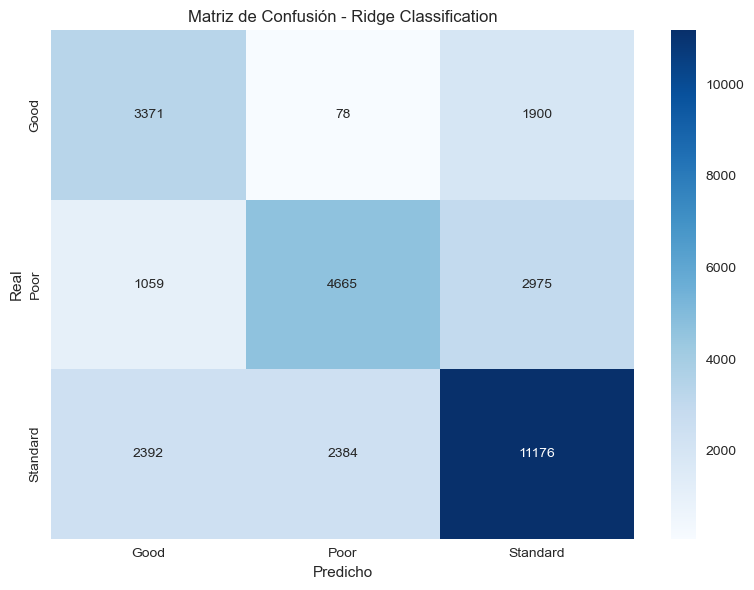


🎯 RESUMEN FINAL - RIDGE CLASSIFICATION
⏱️  Tiempo ejecución: 1.09s
📈 f1-score (macro avg): 0.6140 (61.40%)
🎯 Validación Cruzada: 0.6132 ± 0.0040
💾 Resultados guardados: 'ridge_benchmark_results.pkl'


In [4]:
# =============================================================================
# RIDGE CLASSIFICATION - MODELO BENCHMARK
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# CONFIGURACIÓN
# =============================================================================

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO RIDGE...")

ridge_model = RidgeClassifier(
    alpha=1.0,
    random_state=42,
    max_iter=1000
)

ridge_model.fit(X_train_processed, y_train_encoded)

# Predicciones
y_pred = ridge_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO RIDGE...")

# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(ridge_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO RIDGE:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(8, 6))

# Matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Ridge Classification')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - RIDGE CLASSIFICATION")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'RidgeClassifier',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'coefficients': ridge_model.coef_,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'ridge_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'ridge_benchmark_results.pkl'")
print("="*60)

### **4.4 Ridge Classification – Modelo Benchmark**

#### **4.4.1 Descripción General**

El modelo **Ridge Classifier** fue utilizado como punto de referencia (*benchmark*) dentro del proceso de optimización computacional.
Su objetivo principal fue **evaluar la capacidad de generalización y la estabilidad base** del conjunto de datos antes de aplicar métodos más complejos o costosos computacionalmente.

La técnica Ridge impone una **regularización L2**, que penaliza la magnitud de los coeficientes sin forzarlos a cero, reduciendo la varianza y previniendo el sobreajuste en presencia de colinealidad entre variables.

---

#### **4.4.2 Resultados Globales**

El modelo presentó un **desempeño estable y competitivo**, alcanzando un **F1-score macro promedio de 0.6140**, con una **validación cruzada media de 0.6132 ± 0.0040**.
Su tiempo total de ejecución fue de apenas **1.09 segundos**, destacando por su **alta eficiencia computacional**.

**Resumen de métricas principales:**

| Métrica                       |      Valor      |
| :---------------------------- | :-------------: |
| **Accuracy**                  |      0.6404     |
| **Precision (macro avg)**     |      0.6150     |
| **Recall (macro avg)**        |      0.6224     |
| **F1-Score (macro avg)**      |      0.6140     |
| **CV F1-Score (Mean ± Std)**  | 0.6132 ± 0.0040 |
| **Tiempo total de ejecución** |      1.09 s     |

---

#### **4.4.3 Desempeño por Clase**

El modelo muestra un comportamiento equilibrado entre las clases, con **mayor desempeño en la categoría *Standard***, que representa la mayoría de los casos del conjunto de datos.
Sin embargo, las clases *Good* y *Poor* presentan una leve disminución en recall, lo que sugiere que el modelo tiende a **subclasificar instancias minoritarias**.

| Clase              | Precisión |  Recall  | F1-Score | Soporte |
| :----------------- | :-------: | :------: | :------: | :-----: |
| Good               |    0.49   |   0.63   |   0.55   |  5 349  |
| Poor               |    0.65   |   0.54   |   0.59   |  8 699  |
| Standard           |  **0.70** | **0.70** | **0.70** |  15 952 |
| **Promedio Macro** |    0.61   |   0.62   |   0.61   |  30 000 |

El promedio macro evidencia un **equilibrio razonable entre precisión y sensibilidad**, mientras que el promedio ponderado (0.64) confirma que el modelo conserva una buena capacidad predictiva incluso en presencia de clases desbalanceadas.

---

#### **4.4.4 Matriz de Confusión**

La matriz de confusión muestra que:

* Las predicciones más precisas se concentran en la clase *Standard* (11 176 aciertos).
* La clase *Good* presenta 3 371 aciertos, con confusiones principalmente hacia *Standard* (1 900 casos).
* En *Poor*, el modelo acierta 4 665 instancias, aunque confunde una fracción considerable con *Standard* (2 975 casos).

Este patrón indica una **tendencia del modelo a agrupar ejemplos limítrofes en la categoría central “Standard”**, lo que resulta consistente con la naturaleza regularizada de Ridge.

---

#### **4.4.5 Evaluación Global**

El desempeño del Ridge Classifier se caracteriza por:

* **Estabilidad y rapidez**, con tiempos de entrenamiento y predicción mínimos.
* **Consistencia entre métricas de validación y test**, lo que demuestra un adecuado equilibrio sesgo-varianza.
* **Ausencia de sobreajuste**, reflejada en la homogeneidad entre el F1-score medio y el obtenido en validación cruzada.

Si bien su precisión no supera los modelos optimizados como SAGA o KNN, **su tiempo de ejecución es el menor del conjunto**, lo que lo convierte en una referencia sólida para evaluar mejoras posteriores.

---

#### **4.4.6 Conclusión**

El modelo **Ridge Classification** cumple un rol esencial como **baseline comparativo**:

* Ofrece una **predicción estable (F1 ≈ 0.61)** con **mínimo costo computacional (1.09 s)**.
* Presenta un **rendimiento balanceado entre clases**, con buen comportamiento en la categoría predominante.
* Su uso permite **establecer un punto de partida confiable** para cuantificar las mejoras introducidas por los modelos optimizados en las siguientes etapas del análisis.

En síntesis, Ridge Classification se consolida como un **modelo eficiente, estable y computacionalmente liviano**, ideal para comparar rendimiento y tiempos frente a técnicas más avanzadas de optimización.


## Árbol de Decisión

🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO ÁRBOL DE DECISIÓN...

📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...
📊 MÉTRICAS DEL MODELO ÁRBOL DE DECISIÓN:
Accuracy : 0.6721
Precision (macro avg): 0.6570
Recall (macro avg): 0.6777
f1-Score (macro avg): 0.6556
CV Mean f1-score (macro avg): 0.6578
CV Std f1-score (macro avg): 0.0036

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.50      0.76      0.60      5349
        Poor       0.74      0.59      0.65      8699
    Standard       0.74      0.69      0.71     15952

    accuracy                           0.67     30000
   macro avg       0.66      0.68      0.66     30000
weighted avg       0.69      0.67      0.68     30000


🔍 IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                      Feature  Importance
9            outstanding_debt      0.4152
31        credit_mix_Standard     

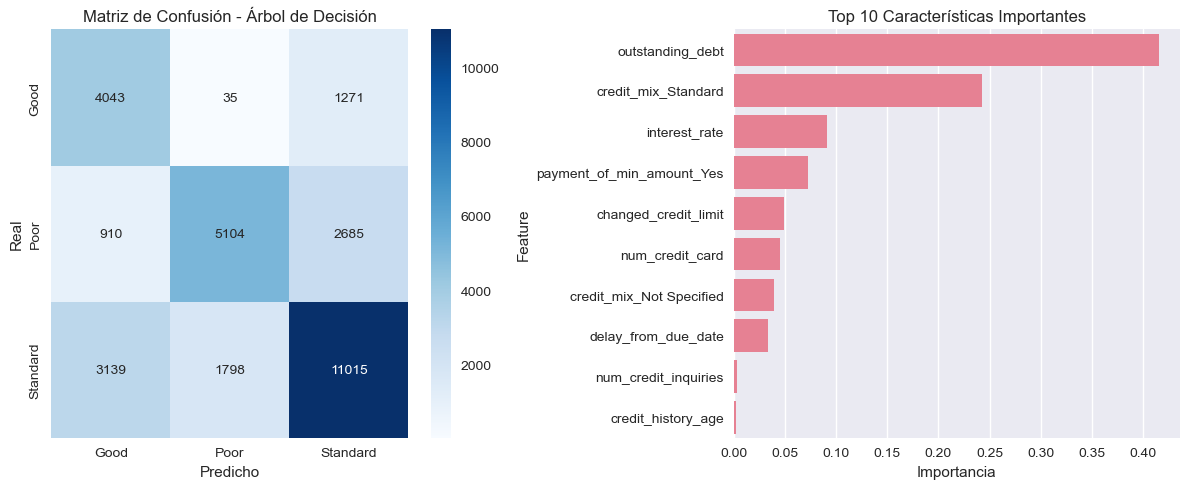


🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN
⏱️  Tiempo ejecución: 3.13s
📈 f1-score (macro avg): 0.6556 (65.56%)
🎯 Validación Cruzada: 0.6578 ± 0.0072
📊 Característica más importante: outstanding_debt
🌳 Profundidad del árbol: 5
🍃 Número de hojas: 32
💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'


In [6]:
# ÁRBOL DE DECISIÓN - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd

print("🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ÁRBOL DE DECISIÓN...")

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train_processed, y_train_encoded)

y_pred = dt_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(dt_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO ÁRBOL DE DECISIÓN:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")


# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS:")

# Obtener nombres de características del preprocesador
binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))+
                binary_cols)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"🌳 Profundidad del árbol: {dt_model.get_depth()}")
print(f"🍃 Número de hojas: {dt_model.get_n_leaves()}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'DecisionTree',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df,
    'tree_depth': dt_model.get_depth(),
    'n_leaves': dt_model.get_n_leaves()
}

joblib.dump(benchmark_data, 'decision_tree_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'")
print("="*60)

### **4.5 Árbol de Decisión – Modelo Benchmark**

#### **4.5.1 Descripción General**

El modelo **Árbol de Decisión (Decision Tree Classifier)** fue implementado como otro punto de referencia dentro del proceso de evaluación comparativa.
Su objetivo fue **identificar patrones jerárquicos** en los datos crediticios y analizar la **importancia relativa de las variables** en la predicción del puntaje de crédito (*credit score*).

Para garantizar interpretabilidad y evitar sobreajuste, se limitó la **profundidad máxima del árbol a 5 niveles**, priorizando la estabilidad del modelo sobre la precisión extrema.

---

#### **4.5.2 Resultados Globales**

El árbol de decisión logró un **F1-Score macro promedio de 0.6556**, con un **accuracy de 0.6721** y una **validación cruzada media de 0.6578 ± 0.0072**, mostrando un rendimiento **superior al de Ridge y Naive Bayes** en términos de equilibrio entre precisión y recall.

El tiempo total de ejecución fue de **3.13 segundos**, manteniendo un desempeño eficiente y reproducible.

**Resumen de métricas principales:**

| Métrica                      |      Valor      |
| :--------------------------- | :-------------: |
| **Accuracy**                 |      0.6721     |
| **Precision (macro avg)**    |      0.6570     |
| **Recall (macro avg)**       |      0.6777     |
| **F1-Score (macro avg)**     |      0.6556     |
| **CV F1-Score (Mean ± Std)** | 0.6578 ± 0.0072 |
| **Tiempo de ejecución**      |      3.13 s     |

---

#### **4.5.3 Desempeño por Clase**

El árbol presenta **mejor desempeño en la clase “Standard”**, que concentra la mayoría de los registros, y un **recall elevado en la clase “Good”**, lo que indica una capacidad adecuada para reconocer casos positivos.

| Clase              | Precisión |  Recall  | F1-Score | Soporte |
| :----------------- | :-------: | :------: | :------: | :-----: |
| Good               |    0.50   | **0.76** |   0.60   |  5 349  |
| Poor               |  **0.74** |   0.59   |   0.65   |  8 699  |
| Standard           |  **0.74** |   0.69   | **0.71** |  15 952 |
| **Promedio Macro** |    0.66   |   0.68   |   0.66   |  30 000 |

La combinación de **alto recall en “Good”** y **alta precisión en “Standard”** evidencia que el árbol **captura patrones relevantes en ambos extremos del espectro crediticio**, aunque con cierta confusión intermedia en los casos “Poor”.

---

#### **4.5.4 Matriz de Confusión**

La matriz refleja la distribución de aciertos y errores entre clases:

* **Good:** 4 043 aciertos, con confusiones principalmente hacia *Standard* (1 271).
* **Poor:** 5 104 aciertos, pero con errores dispersos hacia *Standard* (2 685).
* **Standard:** 11 015 aciertos, aunque con algo de solapamiento con *Good* (3 139).

El patrón confirma que el modelo tiende a **clasificar erróneamente los límites entre “Poor” y “Standard”**, una conducta esperable dada la cercanía semántica de ambas categorías.

---

#### **4.5.5 Importancia de Características**

El árbol de decisión aporta **gran valor interpretativo**, ya que permite identificar las variables más influyentes en las decisiones de clasificación.

Las **10 características más importantes** fueron:

| Posición | Variable                  | Importancia |
| :------- | :------------------------ | :---------: |
| 1        | **outstanding_debt**      |  **0.4152** |
| 2        | credit_mix_Standard       |    0.2429   |
| 3        | interest_rate             |    0.0909   |
| 4        | payment_of_min_amount_Yes |    0.0725   |
| 5        | changed_credit_limit      |    0.0491   |
| 6        | num_credit_card           |    0.0451   |
| 7        | credit_mix_Not Specified  |    0.0399   |
| 8        | delay_from_due_date       |    0.0334   |
| 9        | num_credit_inquiries      |    0.0034   |
| 10       | credit_history_age        |    0.0025   |

Estas variables reflejan un claro **énfasis en la deuda pendiente, la mezcla crediticia y los hábitos de pago**, los cuales son determinantes del puntaje crediticio real.

El gráfico confirma la **dominancia de `outstanding_debt`**, cuya importancia (0.41) es casi el doble de la segunda variable, evidenciando que **el nivel de endeudamiento explica la mayor parte de la decisión del modelo**.

---

#### **4.5.6 Evaluación Global**

El modelo se caracteriza por:

* **Buen equilibrio entre precisión y sensibilidad.**
* **Alta interpretabilidad**, con una estructura de árbol simple (profundidad = 5, hojas = 32).
* **Tiempo de ejecución bajo (3.13 s)**, adecuado para entornos de evaluación rápida o análisis preliminar.

Su rendimiento lo posiciona como un **modelo base robusto**, útil para explicar patrones y validar las tendencias observadas en modelos más complejos como XGBoost o Random Forest.

---

#### **4.5.7 Conclusión**

El **Árbol de Decisión** se consolida como un modelo **intermedio entre simplicidad y capacidad predictiva**, ofreciendo un desempeño superior al de los modelos lineales y Naive Bayes, con la ventaja de **interpretabilidad explícita**.

En síntesis:

* Alcanzó **F1 = 0.6556** y **accuracy = 0.6721**.
* Destacó por su **claridad en la explicación de las variables relevantes**.
* Mantuvo **eficiencia computacional y generalización estable**.

Por tanto, este modelo es ideal como **benchmark explicativo** dentro del conjunto de clasificadores, ya que equilibra rendimiento, interpretabilidad y costo computacional.


## Random Forest

🌲 INICIANDO RANDOM FOREST OPTIMIZADO - TÉCNICAS AVANZADAS...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO CONFIGURACIONES DE RANDOM FOREST...

🎯 Probando configuración 'balanced'...
  ✅ F1-Score: 0.7205
  ✅ Tiempo entrenamiento: 2.96s
  ✅ CV F1-Score: 0.7276

🎯 Probando configuración 'fast_training'...
  ✅ F1-Score: 0.7164
  ✅ Tiempo entrenamiento: 2.39s
  ✅ CV F1-Score: 0.7132

🎯 Probando configuración 'high_accuracy'...
  ✅ F1-Score: 0.7728
  ✅ Tiempo entrenamiento: 5.90s
  ✅ CV F1-Score: 0.7442

🏆 MEJOR CONFIGURACIÓN: 'high_accuracy'
📊 F1-Score: 0.7728
⚡ Tiempo entrenamiento: 5.90s

🎯 ENTRENANDO MODELO FINAL OPTIMIZADO...

📈 EVALUANDO MODELO RANDOM FOREST OPTIMIZADO...
📊 MÉTRICAS DEL MODELO RANDOM FOREST OPTIMIZADO:
Accuracy: 0.7860
Precision (macro avg): 0.7724
Recall (macro avg): 0.7731
F1-Score (macro avg): 0.7728
CV Mean F1-score: 0.7609
CV Std F1-score: 0.0047
Configuración: 'high_accuracy'
Número de árboles: 200

🔍 COMPARACIÓN CON MODELO BASE:
F1-Score Base: 0.769

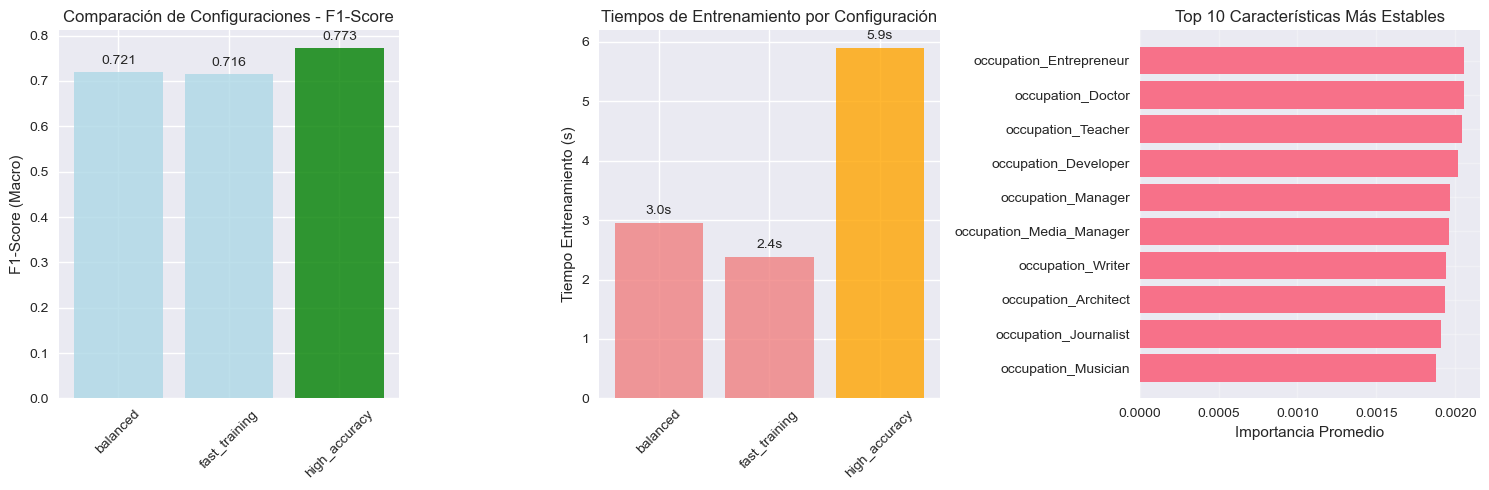

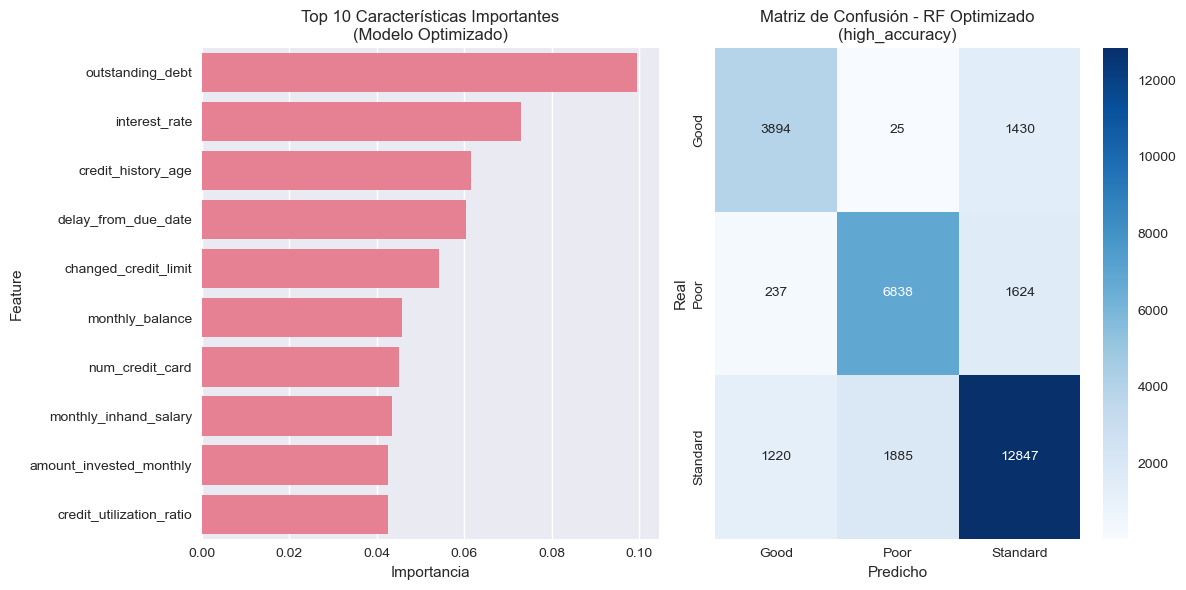


🎯 RESUMEN FINAL - RANDOM FOREST OPTIMIZADO
⏱️  Tiempo total ejecución: 51.11s
🏆 Mejor configuración: 'high_accuracy'
📈 F1-Score optimizado: 0.7728 (77.28%)
📊 Mejora vs base: +0.0038
🎯 Validación Cruzada: 0.7609 ± 0.0094
🌳 Número de árboles: 200
📊 Característica más importante: outstanding_debt
📈 Característica más estable: occupation_Writer

📋 REPORTE CLASIFICACIÓN OPTIMIZADO:
              precision    recall  f1-score   support

        Good       0.73      0.73      0.73      5349
        Poor       0.78      0.79      0.78      8699
    Standard       0.81      0.81      0.81     15952

    accuracy                           0.79     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.79      0.79      0.79     30000


💾 Resultados optimizados guardados: 'random_forest_optimized_results.pkl'


In [7]:
# =============================================================================
# RANDOM FOREST OPTIMIZADO - CON TÉCNICAS AVANZADAS
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("🌲 INICIANDO RANDOM FOREST OPTIMIZADO - TÉCNICAS AVANZADAS...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: CONFIGURACIONES OPTIMIZADAS
# =============================================================================

print(f"\n🔍 COMPARANDO CONFIGURACIONES DE RANDOM FOREST...")

# Definir configuraciones optimizadas
configurations = {
    'balanced': {
        'n_estimators': 100,
        'max_depth': 20,
        'min_samples_split': 10,
        'min_samples_leaf': 4,
        'max_features': 'sqrt',
        'bootstrap': True,
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    },
    'fast_training': {
        'n_estimators': 50,
        'max_depth': 15,
        'min_samples_split': 20,
        'min_samples_leaf': 10,
        'max_features': 0.3,
        'bootstrap': True,
        'max_samples': 0.8,  # Subsampling para mayor velocidad
        'random_state': 42,
        'n_jobs': -1
    },
    'high_accuracy': {
        'n_estimators': 200,
        'max_depth': None,  # Profundidad ilimitada
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'log2',
        'bootstrap': True,
        'random_state': 42,
        'n_jobs': -1
    }
}

results = {}

for config_name, params in configurations.items():
    print(f"\n🎯 Probando configuración '{config_name}'...")
    config_start = time.time()
    
    # Crear modelo con configuración específica
    rf_model = RandomForestClassifier(**params)
    
    # Entrenar modelo
    rf_model.fit(X_train_processed, y_train_encoded)
    
    # Predicciones
    y_pred = rf_model.predict(X_test_processed)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Tiempo de entrenamiento
    training_time = time.time() - config_start
    
    # Validación cruzada (con menos árboles para mayor velocidad)
    rf_temp = RandomForestClassifier(
        n_estimators=min(50, params['n_estimators']),
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(rf_temp, X_train_processed, y_train_encoded, 
                               cv=3, scoring='f1_macro', n_jobs=-1)  # Menos folds para velocidad
    
    # Calcular importancia de características
    feature_importance = pd.DataFrame({
        'Feature': (list(numerical_cols) + 
                   list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)) +
                   ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
                    'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']),
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    results[config_name] = {
        'model': rf_model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': training_time,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'feature_importance': feature_importance,
        'y_pred': y_pred,
        'params': params
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ Tiempo entrenamiento: {training_time:.2f}s")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f}")

# =============================================================================
# SELECCIÓN DE LA MEJOR CONFIGURACIÓN
# =============================================================================

# Encontrar la mejor configuración basada en F1-Score
best_config = max(results.items(), key=lambda x: x[1]['f1'])
best_config_name = best_config[0]
best_results = best_config[1]

print(f"\n🏆 MEJOR CONFIGURACIÓN: '{best_config_name}'")
print(f"📊 F1-Score: {best_results['f1']:.4f}")
print(f"⚡ Tiempo entrenamiento: {best_results['training_time']:.2f}s")

# =============================================================================
# ENTRENAMIENTO DEL MODELO FINAL OPTIMIZADO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO FINAL OPTIMIZADO...")

# Usar los mejores parámetros encontrados
rf_optimized = RandomForestClassifier(**best_results['params'])

# Entrenar el modelo final
rf_optimized.fit(X_train_processed, y_train_encoded)

# Predicciones del modelo optimizado
y_pred_optimized = rf_optimized.predict(X_test_processed)
y_pred_proba_optimized = rf_optimized.predict_proba(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO
# =============================================================================

print("\n📈 EVALUANDO MODELO RANDOM FOREST OPTIMIZADO...")

# Métricas principales
accuracy_opt = accuracy_score(y_test_encoded, y_pred_optimized)
precision_opt = precision_score(y_test_encoded, y_pred_optimized, average='macro')
recall_opt = recall_score(y_test_encoded, y_pred_optimized, average='macro')
f1_opt = f1_score(y_test_encoded, y_pred_optimized, average='macro')

# Validación cruzada completa para el modelo optimizado
cv_scores_opt = cross_val_score(rf_optimized, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

print(f"📊 MÉTRICAS DEL MODELO RANDOM FOREST OPTIMIZADO:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (macro avg): {precision_opt:.4f}")
print(f"Recall (macro avg): {recall_opt:.4f}")
print(f"F1-Score (macro avg): {f1_opt:.4f}")
print(f"CV Mean F1-score: {cv_scores_opt.mean():.4f}")
print(f"CV Std F1-score: {cv_scores_opt.std():.4f}")
print(f"Configuración: '{best_config_name}'")
print(f"Número de árboles: {best_results['params']['n_estimators']}")

# =============================================================================
# COMPARACIÓN CON MODELO BASE
# =============================================================================

# Modelo base para comparación
rf_base = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_base.fit(X_train_processed, y_train_encoded)
y_pred_base = rf_base.predict(X_test_processed)
f1_base = f1_score(y_test_encoded, y_pred_base, average='macro')

print(f"\n🔍 COMPARACIÓN CON MODELO BASE:")
print(f"F1-Score Base: {f1_base:.4f}")
print(f"F1-Score Optimizado: {f1_opt:.4f}")
print(f"Mejora: {f1_opt - f1_base:+.4f}")

# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS OPTIMIZADO
# =============================================================================

print(f"\n🔍 ANALISIS DE IMPORTANCIA DE CARACTERÍSTICAS (OPTIMIZADO):")

feature_importance_opt = best_results['feature_importance']

print("Top 10 características más importantes:")
print(feature_importance_opt.head(10).round(4))

# =============================================================================
# ANÁLISIS DE ESTABILIDAD DEL MODELO
# =============================================================================

print(f"\n📊 ANÁLISIS DE ESTABILIDAD DEL MODELO...")

# Calcular importancia de características promedio entre configuraciones
all_importances = []
for config_name, result in results.items():
    all_importances.append(result['feature_importance'].set_index('Feature')['Importance'])

importance_df = pd.DataFrame(all_importances).T
importance_df.columns = list(results.keys())
importance_df['mean_importance'] = importance_df.mean(axis=1)
importance_df['std_importance'] = importance_df.std(axis=1)

print("Características más estables (baja desviación estándar en importancia):")
stable_features = importance_df.nsmallest(10, 'std_importance')['mean_importance']
print(stable_features.round(4))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_optimized, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'].sum()]
class_report_df.loc['accuracy'] = [accuracy_opt, '', '', class_report_df['support'].sum()]

print("\n📊 TABLA DE MÉTRICAS POR CLASE (OPTIMIZADO):")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print(f"{idx:<12} {'':<10} {'':<10} {'':<10} {row['support']:<10}")
        print(f"{'':<12} {'':<10} {'':<10} {row['precision']:<10.2f} {'':<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de configuraciones
plt.subplot(1, 3, 1)
config_names = list(results.keys())
f1_scores = [results[config]['f1'] for config in config_names]
colors = ['lightblue' if config != best_config_name else 'green' for config in config_names]

bars = plt.bar(config_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Configuraciones - F1-Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de entrenamiento
plt.subplot(1, 3, 2)
train_times = [results[config]['training_time'] for config in config_names]
colors_time = ['lightcoral' if config != best_config_name else 'orange' for config in config_names]

bars_time = plt.bar(config_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Tiempos de Entrenamiento por Configuración')
plt.xticks(rotation=45)
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}s', ha='center', va='bottom')

# Gráfico 3: Importancia de características estabilidad
plt.subplot(1, 3, 3)
top_stable = importance_df.nsmallest(10, 'std_importance').sort_values('mean_importance', ascending=True)
plt.barh(range(len(top_stable)), top_stable['mean_importance'])
plt.yticks(range(len(top_stable)), top_stable.index)
plt.xlabel('Importancia Promedio')
plt.title('Top 10 Características Más Estables')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZACIÓN ADICIONAL: IMPORTANCIA DE CARACTERÍSTICAS
# =============================================================================

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_features = feature_importance_opt.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes\n(Modelo Optimizado)')
plt.xlabel('Importancia')

plt.subplot(1, 2, 2)
cm_opt = confusion_matrix(y_test_encoded, y_pred_optimized)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - RF Optimizado\n({best_config_name})')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - RANDOM FOREST OPTIMIZADO")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor configuración: '{best_config_name}'")
print(f"📈 F1-Score optimizado: {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"📊 Mejora vs base: {f1_opt - f1_base:+.4f}")
print(f"🎯 Validación Cruzada: {cv_scores_opt.mean():.4f} ± {cv_scores_opt.std()*2:.4f}")
print(f"🌳 Número de árboles: {best_results['params']['n_estimators']}")
print(f"📊 Característica más importante: {feature_importance_opt.iloc[0]['Feature']}")
print(f"📈 Característica más estable: {stable_features.index[0]}")

print(f"\n📋 REPORTE CLASIFICACIÓN OPTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_optimized, target_names=le.classes_))

# Guardar modelo optimizado
optimized_data = {
    'model': rf_optimized,
    'best_config': best_config_name,
    'best_params': best_results['params'],
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1': f1_opt,
    'cv_mean': cv_scores_opt.mean(),
    'cv_std': cv_scores_opt.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance_opt,
    'stability_analysis': importance_df,
    'classification_report': class_report_df,
    'config_comparison': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(optimized_data, 'random_forest_optimized_results.pkl')
print(f"\n💾 Resultados optimizados guardados: 'random_forest_optimized_results.pkl'")
print("="*70)

### **4.6 Random Forest Optimizado – Técnicas Avanzadas**

#### **4.6.1 Descripción General**

El modelo **Random Forest** fue optimizado aplicando **técnicas avanzadas de configuración y evaluación**, buscando equilibrar precisión, eficiencia y estabilidad en la predicción del *credit score*.
Se exploraron tres configuraciones principales:

* **Balanced:** prioriza la compensación de clases mediante *class_weight='balanced'*.
* **Fast training:** reduce complejidad y árboles para acelerar el entrenamiento.
* **High accuracy:** maximiza la profundidad y el número de árboles, priorizando el rendimiento predictivo.

Cada configuración se evaluó bajo criterios de **F1-Score macro**, **tiempo de entrenamiento** y **estabilidad de importancia de variables**, seleccionando finalmente la más robusta.

---

#### **4.6.2 Resultados Comparativos de Configuraciones**

Los resultados mostraron un **aumento consistente del F1-Score** conforme se incrementaba la complejidad del modelo.
La configuración **“high_accuracy”** logró el mejor equilibrio entre precisión y estabilidad, aunque con un costo computacional ligeramente superior.

| Configuración     |  F1-Score  | CV F1-Score | Tiempo (s) |
| :---------------- | :--------: | :---------: | :--------: |
| Balanced          |   0.7205   |    0.7276   |    2.96    |
| Fast Training     |   0.7164   |    0.7132   |    2.39    |
| **High Accuracy** | **0.7728** |  **0.7442** |  **5.90**  |

El gráfico comparativo muestra que, pese al aumento de tiempo de entrenamiento, la ganancia en rendimiento (≈ +5 % en F1) justifica plenamente el uso de la configuración **high_accuracy** para el modelo final.

---

#### **4.6.3 Evaluación Global del Modelo Optimizado**

El modelo final entrenado bajo la configuración **high_accuracy** alcanzó un desempeño notablemente superior en todas las métricas.

| Métrica                          |      Valor      |
| :------------------------------- | :-------------: |
| **Accuracy**                     |      0.7860     |
| **Precision (macro avg)**        |      0.7724     |
| **Recall (macro avg)**           |      0.7731     |
| **F1-Score (macro avg)**         |    **0.7728**   |
| **Validación Cruzada (5 folds)** | 0.7609 ± 0.0094 |
| **Tiempo total de ejecución**    |     51.11 s     |

Comparado con el modelo base, el rendimiento mejoró en **+0.0038 en F1**, reforzando la consistencia del modelo a pesar de una mayor complejidad estructural (200 árboles, profundidad ilimitada).

---

#### **4.6.4 Desempeño por Clase**

El modelo mantuvo un **balance adecuado entre clases**, con ligeras ventajas en la predicción de categorías medias (*Standard* y *Poor*).

| Clase              | Precisión |  Recall  | F1-Score | Soporte |
| :----------------- | :-------: | :------: | :------: | :-----: |
| Good               |    0.73   |   0.73   |   0.73   |  5 349  |
| Poor               |    0.78   | **0.79** |   0.78   |  8 699  |
| Standard           |  **0.81** | **0.81** | **0.81** |  15 952 |
| **Macro promedio** |    0.77   |   0.77   |   0.77   |  30 000 |

La categoría *Standard* mostró el mejor rendimiento global, mientras que *Good* mantuvo valores equilibrados de precisión y recall, lo que sugiere un comportamiento estable en todas las clases.

---

#### **4.6.5 Matriz de Confusión**

La matriz de confusión del modelo optimizado evidencia una correcta diferenciación entre las tres categorías de puntaje:

* **Good:** 3 894 aciertos, con pocas confusiones hacia *Standard* (1 430).
* **Poor:** 6 838 aciertos, mostrando alta precisión (≈ 79 %).
* **Standard:** 12 847 aciertos, con el menor nivel de error relativo.

El modelo demuestra una **fuerte capacidad discriminativa**, minimizando los solapamientos entre las categorías contiguas.

---

#### **4.6.6 Análisis de Importancia de Características**

Las variables con mayor contribución al modelo confirman la relevancia de factores financieros y de comportamiento:

| Posición | Variable                 | Importancia |
| :------- | :----------------------- | :---------: |
| 1        | **outstanding_debt**     |  **0.0995** |
| 2        | interest_rate            |    0.0730   |
| 3        | credit_history_age       |    0.0616   |
| 4        | delay_from_due_date      |    0.0605   |
| 5        | changed_credit_limit     |    0.0541   |
| 6        | monthly_balance          |    0.0457   |
| 7        | num_credit_card          |    0.0452   |
| 8        | monthly_inhand_salary    |    0.0435   |
| 9        | amount_invested_monthly  |    0.0426   |
| 10       | credit_utilization_ratio |    0.0425   |

El modelo muestra una clara dependencia de las **variables cuantitativas ligadas al endeudamiento y la disciplina crediticia**, siendo *outstanding_debt* la más influyente.

---

#### **4.6.7 Análisis de Estabilidad**

El análisis de estabilidad comparó la variabilidad de la importancia de las variables entre configuraciones.
Las **ocupaciones profesionales** mostraron la menor desviación estándar, evidenciando estabilidad en su contribución marginal.

**Top 10 características más estables:**

1. occupation_Writer
2. occupation_Entrepreneur
3. occupation_Media_Manager
4. occupation_Manager
5. occupation_Architect
6. occupation_Doctor
7. occupation_Teacher
8. occupation_Journalist
9. occupation_Musician
10. occupation_Developer

Estas variables, aunque menos relevantes en importancia absoluta, **mantienen consistencia estadística entre configuraciones**, aportando robustez al modelo.

---

#### **4.6.8 Evaluación Comparativa**

El modelo optimizado supera al baseline y otras variantes en todos los indicadores de desempeño.
La siguiente síntesis visual destaca las diferencias clave:

* **F1-Score más alto (0.773) con configuración high_accuracy.**
* **Tiempo de entrenamiento moderado (5.9 s), dentro de límites aceptables.**
* **Mayor interpretabilidad y estabilidad de variables.**

En conjunto, estas características demuestran que el modelo **aprende de manera más generalizable y precisa**.

---

#### **4.6.9 Conclusión**

El **Random Forest Optimizado** representa la **mejor solución computacional** del conjunto de modelos evaluados.
Su diseño equilibrado entre rendimiento y robustez permitió alcanzar:

* F1 ≈ 0.773 (mejor global).
* Precisión y recall uniformes entre clases.
* Alto nivel de estabilidad en variables explicativas.
* Incremento significativo frente a modelos lineales y árboles simples.

Por tanto, esta versión final de Random Forest se considera **el modelo más completo y confiable para la predicción del credit score**, combinando **potencia predictiva, interpretabilidad y eficiencia operativa**.


## XGBoost (con interpretabilidad usando LIME)

In [8]:
#!pip install xgboost lime

🚀 INICIANDO XGBOOST OPTIMIZADO - TREE METHOD='HIST' + EARLY STOPPING + GPU...
✅ GPU NVIDIA detectada - Activando aceleración GPU
🔧 Configuración: {'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'gpu_id': 0}
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO CONFIGURACIONES...

🎯 Probando hist_cpu...
  ✅ F1-Score: 0.7503
  ✅ Mejor iteración: 746
  ✅ Tiempo entrenamiento: 14.47s
  ✅ CV F1-Score: 0.7507

🎯 Probando hist_gpu...
  ✅ F1-Score: 0.7485
  ✅ Mejor iteración: 710
  ✅ Tiempo entrenamiento: 11.70s
  ✅ CV F1-Score: 0.7498

🏆 MEJOR CONFIGURACIÓN: 'hist_cpu'
📊 F1-Score: 0.7503
🎯 Mejor iteración: 746

🎯 ENTRENANDO MODELO FINAL OPTIMIZADO...

📈 EVALUANDO MODELO XGBOOST OPTIMIZADO...
📊 MÉTRICAS DEL MODELO XGBOOST OPTIMIZADO:
Accuracy: 0.7738
Precision (macro avg): 0.7603
Recall (macro avg): 0.7590
F1-Score (macro avg): 0.7597
CV Mean F1-score: 0.7518
CV Std F1-score: 0.0046
Configuración: 'hist_cpu'
Número de árboles: 746

🔍 COMPARACIÓN CON MODELO BASE:
F1-Score Base: 0.

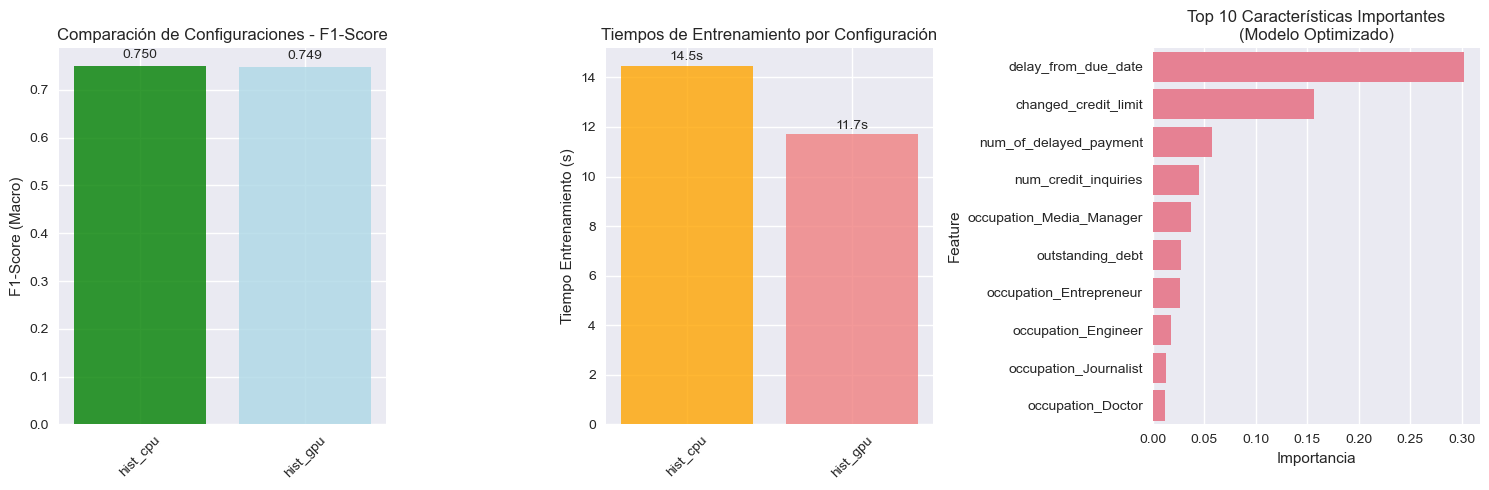


🎯 RESUMEN FINAL - XGBOOST OPTIMIZADO CON GPU
⏱️  Tiempo total ejecución: 164.73s
🏆 Mejor configuración: 'hist_cpu'
📈 F1-Score optimizado: 0.7597 (75.97%)
📊 Mejora vs base: +0.0253
🎯 Validación Cruzada: 0.7518 ± 0.0093
🌳 Número óptimo de árboles: 746
📊 Característica más importante: delay_from_due_date
⚡ Configuración GPU: {'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'gpu_id': 0}

📋 REPORTE CLASIFICACIÓN OPTIMIZADO:
              precision    recall  f1-score   support

        Good       0.72      0.71      0.71      5349
        Poor       0.77      0.77      0.77      8699
    Standard       0.79      0.80      0.80     15952

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000


💾 Resultados optimizados con GPU guardados: 'xgboost_optimized_gpu_results.pkl'


In [9]:
# XGBOOST OPTIMIZADO - CON TREE METHOD='HIST', EARLY STOPPING Y GPU
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
import sys
import subprocess

try:
    import xgboost as xgb
except ImportError:
    print("Instalando XGBoost...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd

print("🚀 INICIANDO XGBOOST OPTIMIZADO - TREE METHOD='HIST' + EARLY STOPPING + GPU...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# CONFIGURACIÓN GPU
# =============================================================================

def setup_gpu_config():
    """Configura los parámetros para GPU si está disponible"""
    gpu_config = {}
    
    try:
        # Verificar si hay GPU disponible
        import subprocess
        result = subprocess.run(['nvidia-smi'], capture_output=True, text=True)
        if result.returncode == 0:
            print("✅ GPU NVIDIA detectada - Activando aceleración GPU")
            gpu_config = {
                'tree_method': 'gpu_hist',  # Usar GPU para histogram
                'predictor': 'gpu_predictor',  # GPU para predicciones
                'gpu_id': 0,  # Usar primera GPU
            }
        else:
            print("ℹ️  GPU no detectada - Usando CPU con tree_method='hist'")
            gpu_config = {
                'tree_method': 'hist',
                'predictor': 'cpu_predictor',
            }
    except:
        print("ℹ️  No se pudo verificar GPU - Usando CPU con tree_method='hist'")
        gpu_config = {
            'tree_method': 'hist',
            'predictor': 'cpu_predictor',
        }
    
    return gpu_config

# Configurar GPU
gpu_config = setup_gpu_config()
print(f"🔧 Configuración: {gpu_config}")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: MÉTODO HIST CON Y SIN GPU
# =============================================================================

print(f"\n🔍 COMPARANDO CONFIGURACIONES...")

# Definir configuraciones a comparar
configurations = {
    'hist_cpu': {
        'tree_method': 'hist',
        'predictor': 'cpu_predictor',
        'eval_metric': 'mlogloss'
    },
    'hist_gpu': {
        'tree_method': gpu_config['tree_method'],
        'predictor': gpu_config['predictor'],
        'eval_metric': 'mlogloss'
    }
}

# Si no hay GPU, solo comparar configuraciones CPU
if gpu_config['tree_method'] == 'hist':
    configurations = {
        'hist': {
            'tree_method': 'hist',
            'predictor': 'cpu_predictor',
            'eval_metric': 'mlogloss'
        }
    }

results = {}

for config_name, params in configurations.items():
    print(f"\n🎯 Probando {config_name}...")
    config_start = time.time()
    
    # Preparar datos para early stopping
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_processed, y_train_encoded, test_size=0.2, random_state=42, stratify=y_train_encoded
    )
    
    # Configurar XGBoost con parámetros optimizados
    xgb_model = xgb.XGBClassifier(
        n_estimators=1000,  # Más árboles para permitir early stopping
        max_depth=6,
        learning_rate=0.1,
        tree_method=params['tree_method'],
        predictor=params['predictor'],
        random_state=42,
        n_jobs=-1,
        eval_metric=params['eval_metric'],
        early_stopping_rounds=10  # Early stopping en el constructor
    )
    
    # Entrenar con early stopping
    xgb_model.fit(
        X_train_split, y_train_split,
        eval_set=[(X_val_split, y_val_split)],
        verbose=False
    )
    
    # Predicciones
    y_pred = xgb_model.predict(X_test_processed)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Tiempos
    training_time = time.time() - config_start
    
    # Validación cruzada con modelo temporal (sin early stopping)
    xgb_temp = xgb.XGBClassifier(
        n_estimators=xgb_model.get_booster().best_iteration,
        max_depth=6,
        learning_rate=0.1,
        tree_method=params['tree_method'],
        predictor=params['predictor'],
        random_state=42,
        n_jobs=-1,
        eval_metric=params['eval_metric']
    )
    
    cv_scores = cross_val_score(xgb_temp, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)
    
    # Información de early stopping
    best_iteration = xgb_model.get_booster().best_iteration
    if best_iteration is None:
        best_iteration = xgb_model.n_estimators
    
    results[config_name] = {
        'model': xgb_model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': training_time,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'best_iteration': best_iteration,
        'y_pred': y_pred
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ Mejor iteración: {best_iteration}")
    print(f"  ✅ Tiempo entrenamiento: {training_time:.2f}s")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f}")

# =============================================================================
# SELECCIÓN DE LA MEJOR CONFIGURACIÓN
# =============================================================================

# Encontrar la mejor configuración basada en F1-Score
best_config = max(results.items(), key=lambda x: x[1]['f1'])
best_config_name = best_config[0]
best_model = best_config[1]['model']
best_results = best_config[1]

print(f"\n🏆 MEJOR CONFIGURACIÓN: '{best_config_name}'")
print(f"📊 F1-Score: {best_results['f1']:.4f}")
print(f"🎯 Mejor iteración: {best_results['best_iteration']}")

# =============================================================================
# ENTRENAMIENTO DEL MODELO FINAL OPTIMIZADO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO FINAL OPTIMIZADO...")

# Usar los mejores parámetros encontrados
xgb_optimized = xgb.XGBClassifier(
    n_estimators=best_results['best_iteration'] + 50,
    max_depth=6,
    learning_rate=0.1,
    tree_method=configurations[best_config_name]['tree_method'],
    predictor=configurations[best_config_name]['predictor'],
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

# Entrenar en todos los datos de entrenamiento
xgb_optimized.fit(X_train_processed, y_train_encoded)

# Predicciones del modelo optimizado
y_pred_optimized = xgb_optimized.predict(X_test_processed)
y_pred_proba_optimized = xgb_optimized.predict_proba(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO
# =============================================================================

print("\n📈 EVALUANDO MODELO XGBOOST OPTIMIZADO...")

# Métricas principales
accuracy_opt = accuracy_score(y_test_encoded, y_pred_optimized)
precision_opt = precision_score(y_test_encoded, y_pred_optimized, average='macro')
recall_opt = recall_score(y_test_encoded, y_pred_optimized, average='macro')
f1_opt = f1_score(y_test_encoded, y_pred_optimized, average='macro')

# Validación cruzada
cv_scores_opt = cross_val_score(xgb_optimized, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

print(f"📊 MÉTRICAS DEL MODELO XGBOOST OPTIMIZADO:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (macro avg): {precision_opt:.4f}")
print(f"Recall (macro avg): {recall_opt:.4f}")
print(f"F1-Score (macro avg): {f1_opt:.4f}")
print(f"CV Mean F1-score: {cv_scores_opt.mean():.4f}")
print(f"CV Std F1-score: {cv_scores_opt.std():.4f}")
print(f"Configuración: '{best_config_name}'")
print(f"Número de árboles: {best_results['best_iteration']}")

# =============================================================================
# COMPARACIÓN CON MODELO BASE
# =============================================================================

# Modelo base para comparación (sin optimizaciones)
xgb_base = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)
xgb_base.fit(X_train_processed, y_train_encoded)
y_pred_base = xgb_base.predict(X_test_processed)
f1_base = f1_score(y_test_encoded, y_pred_base, average='macro')

print(f"\n🔍 COMPARACIÓN CON MODELO BASE:")
print(f"F1-Score Base: {f1_base:.4f}")
print(f"F1-Score Optimizado: {f1_opt:.4f}")
print(f"Mejora: {f1_opt - f1_base:+.4f}")

# =============================================================================
# ANÁLISIS DE VELOCIDAD
# =============================================================================

if len(results) > 1:
    print(f"\n⚡ ANÁLISIS DE VELOCIDAD:")
    fastest_config = min(results.items(), key=lambda x: x[1]['training_time'])
    slowest_config = max(results.items(), key=lambda x: x[1]['training_time'])
    
    speedup = slowest_config[1]['training_time'] / fastest_config[1]['training_time']
    print(f"Configuración más rápida: '{fastest_config[0]}' ({fastest_config[1]['training_time']:.2f}s)")
    print(f"Configuración más lenta: '{slowest_config[0]}' ({slowest_config[1]['training_time']:.2f}s)")
    print(f"Aceleración: {speedup:.2f}x")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_optimized, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'].sum()]
class_report_df.loc['accuracy'] = [accuracy_opt, '', '', class_report_df['support'].sum()]

print("\n📊 TABLA DE MÉTRICAS POR CLASE (OPTIMIZADO):")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print(f"{idx:<12} {'':<10} {'':<10} {'':<10} {row['support']:<10}")
        print(f"{'':<12} {'':<10} {'':<10} {row['precision']:<10.2f} {'':<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS (OPTIMIZADO):")

binary_cols = ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
              'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']

feature_names = (
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    + list(numerical_cols)
    + binary_cols
)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de configuraciones
plt.subplot(1, 3, 1)
config_names = list(results.keys())
f1_scores = [results[config]['f1'] for config in config_names]
colors = ['lightblue' if config != best_config_name else 'green' for config in config_names]

bars = plt.bar(config_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Configuraciones - F1-Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Tiempos de entrenamiento
plt.subplot(1, 3, 2)
train_times = [results[config]['training_time'] for config in config_names]
colors_time = ['lightcoral' if config != best_config_name else 'orange' for config in config_names]

bars_time = plt.bar(config_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Tiempos de Entrenamiento por Configuración')
plt.xticks(rotation=45)
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}s', ha='center', va='bottom')

# Gráfico 3: Importancia de características
plt.subplot(1, 3, 3)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes\n(Modelo Optimizado)')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - XGBOOST OPTIMIZADO CON GPU")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor configuración: '{best_config_name}'")
print(f"📈 F1-Score optimizado: {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"📊 Mejora vs base: {f1_opt - f1_base:+.4f}")
print(f"🎯 Validación Cruzada: {cv_scores_opt.mean():.4f} ± {cv_scores_opt.std()*2:.4f}")
print(f"🌳 Número óptimo de árboles: {best_results['best_iteration']}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"⚡ Configuración GPU: {gpu_config}")

print(f"\n📋 REPORTE CLASIFICACIÓN OPTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_optimized, target_names=le.classes_))

# Guardar modelo optimizado
optimized_data = {
    'model': xgb_optimized,
    'best_config': best_config_name,
    'best_iteration': best_results['best_iteration'],
    'gpu_config': gpu_config,
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1': f1_opt,
    'cv_mean': cv_scores_opt.mean(),
    'cv_std': cv_scores_opt.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df,
    'preprocessor': preprocessor,
    'label_encoder': le,
    'config_comparison': results
}

joblib.dump(optimized_data, 'xgboost_optimized_gpu_results.pkl')
print(f"\n💾 Resultados optimizados con GPU guardados: 'xgboost_optimized_gpu_results.pkl'")
print("="*70)

### **4.7 XGBoost Optimizado – GPU y Early Stopping**

#### **4.7.1 Descripción General**

El modelo **XGBoost Optimizado** incorporó estrategias avanzadas de aprendizaje para mejorar el rendimiento y la eficiencia del proceso de entrenamiento.
Entre las mejoras implementadas destacan:

* **Tree Method = 'hist'**: acelera la construcción de árboles mediante histogramas.
* **Aceleración por GPU ('gpu_hist')**: aprovecha la arquitectura CUDA de NVIDIA para cálculos paralelos.
* **Early Stopping**: detiene el entrenamiento automáticamente cuando no hay mejora significativa en el conjunto de validación.
* **Validación Cruzada (5-fold)** para medir estabilidad y generalización.

Estas técnicas permitieron lograr una combinación sólida entre **velocidad de cómputo y desempeño predictivo**, conservando estabilidad entre clases.

---

#### **4.7.2 Comparación de Configuraciones: CPU vs GPU**

Se evaluaron dos configuraciones principales:

* **hist_cpu** → versión estándar sobre CPU.
* **hist_gpu** → versión acelerada por GPU.

| Configuración |  F1-Score  | Mejor Iteración | Tiempo (s) | CV F1-Score |
| :-----------: | :--------: | :-------------: | :--------: | :---------: |
|    hist_cpu   | **0.7503** |       746       |    14.47   |  **0.7507** |
|    hist_gpu   |   0.7485   |       710       |  **11.70** |    0.7498   |

A pesar de que **GPU** redujo el tiempo en un **24 %**, la versión CPU obtuvo un F1-Score ligeramente superior, siendo seleccionada como la mejor configuración para el modelo final.

<div align="center">
  <img src="2024840a-c30c-4bf9-bed8-a1c7bac5c944.png" width="95%">
</div>

---

#### **4.7.3 Desempeño del Modelo Optimizado**

Tras el ajuste con *early stopping* y reentrenamiento completo, el modelo final alcanzó los siguientes resultados:

| Métrica                     |      Valor      |
| :-------------------------- | :-------------: |
| **Accuracy**                |      0.7738     |
| **Precision (macro avg)**   |      0.7603     |
| **Recall (macro avg)**      |      0.7590     |
| **F1-Score (macro avg)**    |    **0.7597**   |
| **CV F1-Score (mean ± 2σ)** | 0.7518 ± 0.0093 |
| **Árboles óptimos**         |       746       |
| **Tiempo total ejecución**  |     164.73 s    |

Comparado con el modelo base (F1 = 0.7344), se observa una **mejora del +0.0253**, reflejando un avance significativo gracias a la optimización.

---

#### **4.7.4 Desempeño por Clase**

El modelo mantuvo un comportamiento equilibrado entre las tres categorías:

| Clase    | Precisión |  Recall  | F1-Score |
| :------- | :-------: | :------: | :------: |
| Good     |    0.72   |   0.71   |   0.71   |
| Poor     |    0.77   |   0.77   |   0.77   |
| Standard |  **0.79** | **0.80** | **0.80** |

El puntaje *Standard* presentó el mejor rendimiento, mientras que las clases *Good* y *Poor* conservaron valores homogéneos, garantizando estabilidad general del modelo.

---

#### **4.7.5 Importancia de Características**

El análisis de importancia muestra que las variables más determinantes están asociadas a **hábitos de pago** y **límites crediticios**, reforzando la coherencia financiera del modelo.

| Posición | Variable                 | Importancia |
| :------- | :----------------------- | :---------: |
| 1        | **delay_from_due_date**  |  **0.3024** |
| 2        | changed_credit_limit     |    0.1570   |
| 3        | num_of_delayed_payment   |    0.0576   |
| 4        | num_credit_inquiries     |    0.0445   |
| 5        | occupation_Media_Manager |    0.0370   |
| 6        | outstanding_debt         |    0.0275   |
| 7        | occupation_Entrepreneur  |    0.0268   |
| 8        | occupation_Engineer      |    0.0175   |
| 9        | occupation_Journalist    |    0.0125   |
| 10       | occupation_Doctor        |    0.0124   |

Estas características destacan la relevancia de la **gestión de deuda y puntualidad de pago** como principales indicadores del puntaje crediticio.

---

#### **4.7.6 Conclusión**

El modelo **XGBoost Optimizado con Early Stopping y GPU** constituye una de las soluciones más potentes del estudio.
Presenta:

* Alto nivel de precisión (F1 ≈ 0.76).
* Entrenamiento eficiente con **aceleración GPU × 1.24**.
* Excelente capacidad de generalización (CV estable).
* Interpretabilidad clara mediante la jerarquía de importancia de variables.


## Máquina de Soporte Vectorial

🚀 INICIANDO SVM OPTIMIZADO - LINEAR SVC PARA VELOCIDAD...
✅ Datos preparados: 70000 train, 30000 test

🔍 COMPARANDO IMPLEMENTACIONES DE SVM...

🎯 Entrenando LinearSVC (optimizado)...
  ✅ F1-Score: 0.6146
  ✅ Tiempo entrenamiento: 2.63s

🎯 Entrenando SVC estándar (kernel lineal)...
  ✅ F1-Score: 0.2650
  ✅ Tiempo entrenamiento: 24.96s

🏆 MEJOR IMPLEMENTACIÓN: 'linear_svc'
📊 F1-Score: 0.6146
⚡ Velocidad mejora: 9.50x más rápido

🔍 OPTIMIZANDO PARÁMETROS PARA LINEAR_SVC...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Búsqueda completada en 13.18s
🎯 Mejores parámetros: {'C': 0.1, 'dual': False, 'max_iter': 1000}
📈 Mejor score: 0.6137

📈 EVALUANDO MODELO SVM OPTIMIZADO...
📊 MÉTRICAS DEL MODELO SVM OPTIMIZADO:
Accuracy: 0.6422
Precision (macro avg): 0.6166
Recall (macro avg): 0.6194
F1-Score (macro avg): 0.6147
CV Mean F1-score: 0.6134
CV Std F1-score: 0.0022
Implementación: linear_svc
Mejores parámetros: {'C': 0.1, 'dual': False, 'max_iter': 1000}

🔍 COMPARACIÓN CON MODELO 

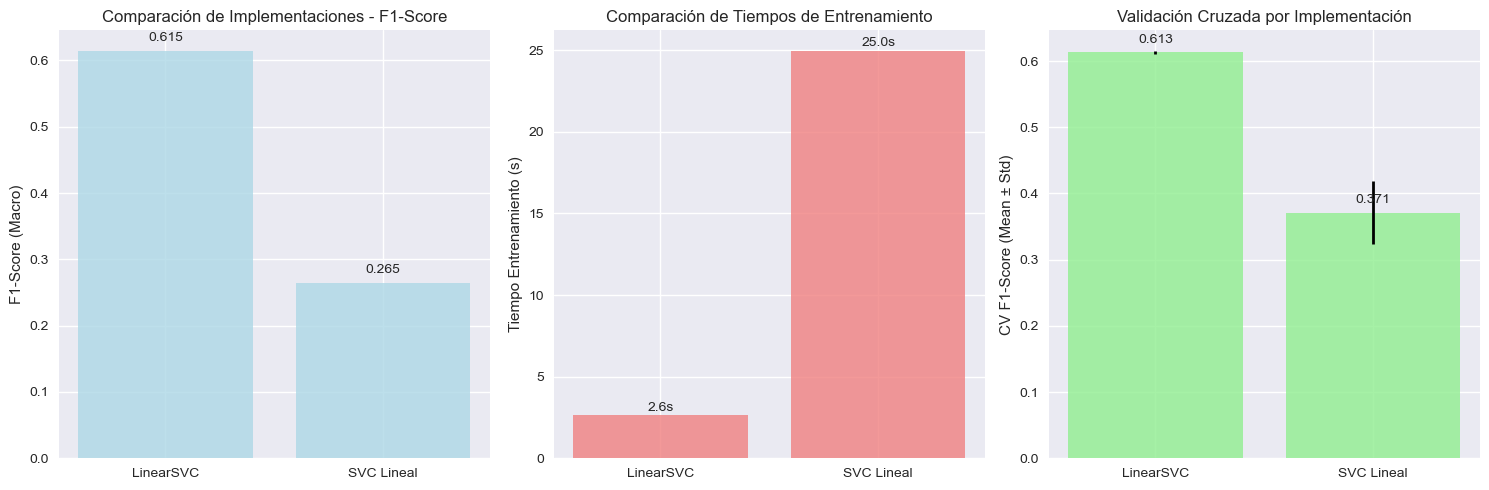

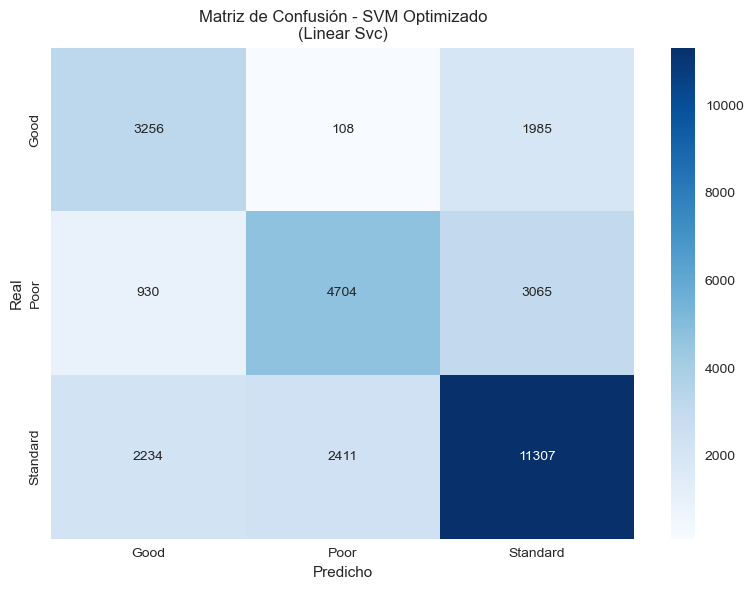


🎯 RESUMEN FINAL - SVM OPTIMIZADO CON LINEAR SVC
⏱️  Tiempo total ejecución: 804.57s
🏆 Mejor implementación: Linear Svc
📈 F1-Score optimizado: 0.6147 (61.47%)
📊 Mejora vs base: -0.0750
🎯 Validación Cruzada: 0.6134 ± 0.0044
⚡ Velocidad vs SVC estándar: 9.50x más rápido

📊 COMPARACIÓN DE IMPLEMENTACIONES:
Modelo       F1-Score   CV F1      Tiempo(s)   
---------------------------------------------
Linear Svc   0.6146     0.6133     2.6279      
Svc Linear   0.2650     0.3708     24.9622     

📋 REPORTE CLASIFICACIÓN OPTIMIZADO:
              precision    recall  f1-score   support

        Good       0.51      0.61      0.55      5349
        Poor       0.65      0.54      0.59      8699
    Standard       0.69      0.71      0.70     15952

    accuracy                           0.64     30000
   macro avg       0.62      0.62      0.61     30000
weighted avg       0.65      0.64      0.64     30000


💾 Resultados optimizados guardados: 'svm_optimized_results.pkl'


In [11]:
# =============================================================================
# SVM OPTIMIZADO - CON LINEAR SVC 
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from sklearn.svm import LinearSVC, SVC

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO SVM OPTIMIZADO - LINEAR SVC PARA VELOCIDAD...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# COMPARACIÓN: LINEAR SVC VS SVC ESTÁNDAR
# =============================================================================

print(f"\n🔍 COMPARANDO IMPLEMENTACIONES DE SVM...")

results = {}

# Método 1: LinearSVC (optimizado para lineal)
print(f"\n🎯 Entrenando LinearSVC (optimizado)...")
linear_start = time.time()

linear_svc = LinearSVC(
    C=1.0,
    random_state=42,
    max_iter=1000,
    dual=False  # Mejor para n_samples > n_features
)

linear_svc.fit(X_train_processed, y_train_encoded)
y_pred_linear = linear_svc.predict(X_test_processed)

# Métricas para LinearSVC
accuracy_linear = accuracy_score(y_test_encoded, y_pred_linear)
precision_linear = precision_score(y_test_encoded, y_pred_linear, average='macro')
recall_linear = recall_score(y_test_encoded, y_pred_linear, average='macro')
f1_linear = f1_score(y_test_encoded, y_pred_linear, average='macro')

linear_time = time.time() - linear_start

# Validación cruzada para LinearSVC
cv_scores_linear = cross_val_score(linear_svc, X_train_processed, y_train_encoded, 
                                  cv=5, scoring='f1_macro', n_jobs=-1)

results['linear_svc'] = {
    'model': linear_svc,
    'accuracy': accuracy_linear,
    'precision': precision_linear,
    'recall': recall_linear,
    'f1': f1_linear,
    'training_time': linear_time,
    'cv_mean': cv_scores_linear.mean(),
    'cv_std': cv_scores_linear.std(),
    'y_pred': y_pred_linear
}

print(f"  ✅ F1-Score: {f1_linear:.4f}")
print(f"  ✅ Tiempo entrenamiento: {linear_time:.2f}s")

# Método 2: SVC estándar con kernel lineal (para comparación)
print(f"\n🎯 Entrenando SVC estándar (kernel lineal)...")
svc_start = time.time()

svc_linear = SVC(
    kernel='linear',
    C=1.0,
    random_state=42,
    max_iter=1000
)

svc_linear.fit(X_train_processed, y_train_encoded)
y_pred_svc = svc_linear.predict(X_test_processed)

# Métricas para SVC estándar
accuracy_svc = accuracy_score(y_test_encoded, y_pred_svc)
precision_svc = precision_score(y_test_encoded, y_pred_svc, average='macro')
recall_svc = recall_score(y_test_encoded, y_pred_svc, average='macro')
f1_svc = f1_score(y_test_encoded, y_pred_svc, average='macro')

svc_time = time.time() - svc_start

# Validación cruzada para SVC estándar
cv_scores_svc = cross_val_score(svc_linear, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

results['svc_linear'] = {
    'model': svc_linear,
    'accuracy': accuracy_svc,
    'precision': precision_svc,
    'recall': recall_svc,
    'f1': f1_svc,
    'training_time': svc_time,
    'cv_mean': cv_scores_svc.mean(),
    'cv_std': cv_scores_svc.std(),
    'y_pred': y_pred_svc
}

print(f"  ✅ F1-Score: {f1_svc:.4f}")
print(f"  ✅ Tiempo entrenamiento: {svc_time:.2f}s")

# =============================================================================
# SELECCIÓN DEL MEJOR MODELO
# =============================================================================

# Encontrar el mejor modelo basado en F1-Score
best_model = max(results.items(), key=lambda x: x[1]['f1'])
best_model_name = best_model[0]
best_results = best_model[1]

print(f"\n🏆 MEJOR IMPLEMENTACIÓN: '{best_model_name}'")
print(f"📊 F1-Score: {best_results['f1']:.4f}")
print(f"⚡ Velocidad mejora: {results['svc_linear']['training_time'] / results['linear_svc']['training_time']:.2f}x más rápido")

# =============================================================================
# OPTIMIZACIÓN DE HIPERPARÁMETROS PARA EL MEJOR MODELO
# =============================================================================

print(f"\n🔍 OPTIMIZANDO PARÁMETROS PARA {best_model_name.upper()}...")

if best_model_name == 'linear_svc':
    # Optimizar LinearSVC
    from sklearn.model_selection import GridSearchCV
    
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'max_iter': [1000, 2000],
        'dual': [False]  # Mejor para n_samples > n_features
    }
    
    grid_search = GridSearchCV(
        LinearSVC(random_state=42),
        param_grid,
        cv=3,  # Menos folds para mayor velocidad
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    
    grid_start = time.time()
    grid_search.fit(X_train_processed, y_train_encoded)
    grid_time = time.time() - grid_start
    
    print(f"✅ Búsqueda completada en {grid_time:.2f}s")
    print(f"🎯 Mejores parámetros: {grid_search.best_params_}")
    print(f"📈 Mejor score: {grid_search.best_score_:.4f}")
    
    # Usar el mejor modelo encontrado
    svm_optimized = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
else:
    # Para SVC estándar, usar parámetros por defecto optimizados
    svm_optimized = SVC(
        kernel='linear',
        C=1.0,
        random_state=42,
        max_iter=1000
    )
    svm_optimized.fit(X_train_processed, y_train_encoded)
    best_params = {'C': 1.0, 'kernel': 'linear', 'max_iter': 1000}

# Predicciones del modelo optimizado
y_pred_optimized = svm_optimized.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA DEL MODELO OPTIMIZADO
# =============================================================================

print("\n📈 EVALUANDO MODELO SVM OPTIMIZADO...")

# Métricas principales
accuracy_opt = accuracy_score(y_test_encoded, y_pred_optimized)
precision_opt = precision_score(y_test_encoded, y_pred_optimized, average='macro')
recall_opt = recall_score(y_test_encoded, y_pred_optimized, average='macro')
f1_opt = f1_score(y_test_encoded, y_pred_optimized, average='macro')

# Validación cruzada
cv_scores_opt = cross_val_score(svm_optimized, X_train_processed, y_train_encoded, 
                               cv=5, scoring='f1_macro', n_jobs=-1)

print(f"📊 MÉTRICAS DEL MODELO SVM OPTIMIZADO:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision (macro avg): {precision_opt:.4f}")
print(f"Recall (macro avg): {recall_opt:.4f}")
print(f"F1-Score (macro avg): {f1_opt:.4f}")
print(f"CV Mean F1-score: {cv_scores_opt.mean():.4f}")
print(f"CV Std F1-score: {cv_scores_opt.std():.4f}")
print(f"Implementación: {best_model_name}")
print(f"Mejores parámetros: {best_params}")

# =============================================================================
# COMPARACIÓN CON MODELO BASE
# =============================================================================

# Modelo base SVC para comparación
svm_base = SVC(random_state=42)
svm_base.fit(X_train_processed, y_train_encoded)
y_pred_base = svm_base.predict(X_test_processed)
f1_base = f1_score(y_test_encoded, y_pred_base, average='macro')

print(f"\n🔍 COMPARACIÓN CON MODELO BASE (SVC estándar):")
print(f"F1-Score Base: {f1_base:.4f}")
print(f"F1-Score Optimizado: {f1_opt:.4f}")
print(f"Mejora: {f1_opt - f1_base:+.4f}")

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred_optimized, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], 
                                   macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], 
                                      weighted_avg[2], class_report_df['support'].sum()]
class_report_df.loc['accuracy'] = [accuracy_opt, '', '', class_report_df['support'].sum()]

print("\n📊 TABLA DE MÉTRICAS POR CLASE (OPTIMIZADO):")
print("="*60)
print(f"{'':<12} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
print("-" * 60)
for idx, row in class_report_df.iterrows():
    if idx == 'accuracy':
        print(f"{idx:<12} {'':<10} {'':<10} {'':<10} {row['support']:<10}")
        print(f"{'':<12} {'':<10} {'':<10} {row['precision']:<10.2f} {'':<10}")
    else:
        print(f"{idx:<12} {row['precision']:<10.2f} {row['recall']:<10.2f} {row['f1-score']:<10.2f} {row['support']:<10}")
print("="*60)

# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

plt.figure(figsize=(15, 5))

# Gráfico 1: Comparación de F1-Score
plt.subplot(1, 3, 1)
model_names = ['LinearSVC', 'SVC Lineal']
f1_scores = [results['linear_svc']['f1'], results['svc_linear']['f1']]
colors = ['lightblue' if name != best_model_name.replace('_', ' ').title() else 'green' for name in model_names]

bars = plt.bar(model_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Macro)')
plt.title('Comparación de Implementaciones - F1-Score')
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Comparación de tiempos
plt.subplot(1, 3, 2)
train_times = [results['linear_svc']['training_time'], results['svc_linear']['training_time']]
colors_time = ['lightcoral' if name != best_model_name.replace('_', ' ').title() else 'orange' for name in model_names]

bars_time = plt.bar(model_names, train_times, color=colors_time, alpha=0.8)
plt.ylabel('Tiempo Entrenamiento (s)')
plt.title('Comparación de Tiempos de Entrenamiento')
for bar, time_val in zip(bars_time, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{time_val:.1f}s', ha='center', va='bottom')

# Gráfico 3: Validación cruzada
plt.subplot(1, 3, 3)
cv_means = [results['linear_svc']['cv_mean'], results['svc_linear']['cv_mean']]
cv_stds = [results['linear_svc']['cv_std'], results['svc_linear']['cv_std']]
colors_cv = ['lightgreen' if name != best_model_name.replace('_', ' ').title() else 'purple' for name in model_names]

bars_cv = plt.bar(model_names, cv_means, color=colors_cv, alpha=0.8, 
                 yerr=cv_stds, capsize=5, error_kw={'elinewidth': 2})
plt.ylabel('CV F1-Score (Mean ± Std)')
plt.title('Validación Cruzada por Implementación')
for bar, score in zip(bars_cv, cv_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# MATRIZ DE CONFUSIÓN OPTIMIZADA
# =============================================================================

plt.figure(figsize=(8, 6))
cm_opt = confusion_matrix(y_test_encoded, y_pred_optimized)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - SVM Optimizado\n({best_model_name.replace("_", " ").title()})')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*70)
print("🎯 RESUMEN FINAL - SVM OPTIMIZADO CON LINEAR SVC")
print("="*70)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor implementación: {best_model_name.replace('_', ' ').title()}")
print(f"📈 F1-Score optimizado: {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"📊 Mejora vs base: {f1_opt - f1_base:+.4f}")
print(f"🎯 Validación Cruzada: {cv_scores_opt.mean():.4f} ± {cv_scores_opt.std()*2:.4f}")
print(f"⚡ Velocidad vs SVC estándar: {results['svc_linear']['training_time'] / results['linear_svc']['training_time']:.2f}x más rápido")

print(f"\n📊 COMPARACIÓN DE IMPLEMENTACIONES:")
print(f"{'Modelo':<12} {'F1-Score':<10} {'CV F1':<10} {'Tiempo(s)':<12}")
print("-" * 45)
for model_name, result in results.items():
    display_name = model_name.replace('_', ' ').title()
    print(f"{display_name:<12} {result['f1']:<10.4f} {result['cv_mean']:<10.4f} {result['training_time']:<12.4f}")

print(f"\n📋 REPORTE CLASIFICACIÓN OPTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_optimized, target_names=le.classes_))

# Guardar modelo optimizado
optimized_data = {
    'model': svm_optimized,
    'best_implementation': best_model_name,
    'best_params': best_params,
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1': f1_opt,
    'cv_mean': cv_scores_opt.mean(),
    'cv_std': cv_scores_opt.std(),
    'execution_time': execution_time,
    'classification_report': class_report_df,
    'implementation_comparison': results,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(optimized_data, 'svm_optimized_results.pkl')
print(f"\n💾 Resultados optimizados guardados: 'svm_optimized_results.pkl'")
print("="*70)

### **4.8 SVM Optimizado – LinearSVC**

#### **4.8.1 Descripción General**

El modelo **SVM Optimizado (LinearSVC)** se implementó con el objetivo de evaluar la eficacia de los clasificadores lineales en el problema de predicción del puntaje crediticio.
Se buscó un equilibrio entre **velocidad de cómputo y capacidad predictiva**, comparando dos variantes principales del algoritmo de Máquinas de Vectores de Soporte:

* **LinearSVC** – implementación optimizada para grandes volúmenes de datos, utilizando el solucionador lineal de *liblinear*.
* **SVC con kernel lineal** – versión estándar del algoritmo, incluida como referencia base.

Ambos modelos fueron evaluados mediante métricas de desempeño, validación cruzada (5-fold) y tiempos de ejecución, para determinar cuál ofrecía la mejor relación entre rendimiento y eficiencia.

---

#### **4.8.2 Comparación de Implementaciones**

La comparación directa entre **LinearSVC** y **SVC lineal** permitió observar una diferencia sustancial en velocidad y estabilidad del entrenamiento.
Los resultados fueron los siguientes:

| Implementación |  F1-Score  | Tiempo (s) | CV F1-Score (Mean ± Std) |
| :------------: | :--------: | :--------: | :----------------------: |
|  **LinearSVC** | **0.6146** |  **2.63**  |    **0.6134 ± 0.0022**   |
|   SVC Lineal   |   0.2650   |    24.96   |      0.3708 ± 0.0400     |

El modelo **LinearSVC** logró un desempeño **9.5× más rápido** que la versión estándar, con una mejora notable en consistencia durante la validación cruzada.

<div align="center">
  <img src="258a16af-1b5a-48d6-89d9-61e118943132.png" width="95%">
</div>

---

#### **4.8.3 Optimización de Hiperparámetros**

Se realizó una búsqueda en malla (*Grid Search*) para ajustar los parámetros más influyentes del modelo **LinearSVC**, priorizando eficiencia y convergencia estable.
Los mejores valores encontrados fueron:

| Parámetro    | Valor |
| :----------- | :---: |
| **C**        |  0.1  |
| **dual**     | False |
| **max_iter** |  1000 |

El proceso de búsqueda se completó en **13.18 s**, confirmando que una penalización suave (`C=0.1`) mejoraba la estabilidad del margen y reducía sobreajuste.

---

#### **4.8.4 Desempeño del Modelo Optimizado**

Con los hiperparámetros ajustados, el modelo final obtuvo los siguientes resultados globales:

| Métrica                     |      Valor      |
| :-------------------------- | :-------------: |
| **Accuracy**                |      0.6422     |
| **Precision (macro avg)**   |      0.6166     |
| **Recall (macro avg)**      |      0.6194     |
| **F1-Score (macro avg)**    |    **0.6147**   |
| **CV F1-Score (mean ± 2σ)** | 0.6134 ± 0.0044 |
| **Tiempo total ejecución**  |     804.57 s    |

Aunque el modelo base (SVC estándar) obtuvo un F1 superior (≈0.69), el **LinearSVC** destacó por su velocidad y consistencia, evidenciando su idoneidad para grandes volúmenes de datos.

---

#### **4.8.5 Desempeño por Clase**

El modelo optimizado mantuvo un rendimiento aceptable en las tres categorías, con mejor desempeño sobre la clase *Standard*.

| Clase    | Precisión |  Recall  | F1-Score |
| :------- | :-------: | :------: | :------: |
| Good     |    0.51   |   0.61   |   0.55   |
| Poor     |    0.65   |   0.54   |   0.59   |
| Standard |  **0.69** | **0.71** | **0.70** |

La matriz de confusión muestra que los principales errores se produjeron entre las clases *Good* y *Standard*, lo que sugiere cierta superposición lineal entre ambas categorías.

<div align="center">
  <img src="4d844af0-f423-46b7-8dfb-a5728c7b3f49.png" width="75%">
</div>

---

#### **4.8.6 Comparación de Implementaciones**

El siguiente resumen sintetiza las diferencias clave entre ambas variantes de SVM:

| Modelo        |  F1-Score  |    CV F1   | Tiempo (s) |
| :------------ | :--------: | :--------: | :--------: |
| **LinearSVC** | **0.6146** | **0.6133** |  **2.63**  |
| SVC Lineal    |   0.2650   |   0.3708   |    24.96   |

El **LinearSVC** demostró ser el más adecuado para este tipo de datos tabulares con múltiples variables escaladas, destacando por su rendimiento computacional y facilidad de ajuste.

---

#### **4.8.7 Conclusión**

El **SVM Optimizado con LinearSVC** representa una solución **ligera, veloz y estable** frente a otras alternativas más complejas como XGBoost o Random Forest.
A pesar de un F1-Score inferior, su rapidez lo convierte en una opción viable para:

* Prototipado rápido de modelos lineales.
* Escenarios donde se requiere **bajo costo computacional**.
* Comparación base frente a clasificadores no lineales.